In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches
from docx.oxml import OxmlElement
from docx.oxml.ns import qn 

In [2]:
ruta = '../../analisis_de_datos/anexos_analisis.xlsx'
sheet_name_consolidado = 'consolidado_PMA_RCD'
sheet_name_generadores = 'generadores'
sheet_name_gestores = 'gestores'
sheet_name_receptores = 'receptores'
df_consolidado = pd.read_excel(ruta,
                sheet_name=sheet_name_consolidado)
## Seleccionando filas no nulas con respecto a la columna Autoridad Ambiental

df_consolidado = df_consolidado[df_consolidado['autoridad_ambiental'].notna()]
print(df_consolidado.shape)
df_generadores = pd.read_excel(ruta, sheet_name=sheet_name_generadores)
df_gestores = pd.read_excel(ruta, sheet_name=sheet_name_gestores)
df_receptores = pd.read_excel(ruta, sheet_name=sheet_name_receptores)

(92, 72)


c:\Users\Michael_PC\OneDrive - Ministerio de Ambiente y Desarrollo Sostenible\Documentos\trabajos\ministerio_de_ambiente\rcd_env\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\Users\Michael_PC\OneDrive - Ministerio de Ambiente y Desarrollo Sostenible\Documentos\trabajos\ministerio_de_ambiente\rcd_env\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
df_consolidado.head()

generador obra direccion  ton_rcd_obra_aprov_1_0  ton_rcd_obra_aprov_1_1  \
0       NaN  NaN       NaN                     NaN              165396.855   
1       NaN  NaN       NaN                     NaN                     NaN   
2       NaN  NaN       NaN                     NaN              115101.864   
3       NaN  NaN       NaN                  4057.6                6115.600   
4       NaN  NaN       NaN                     NaN                     NaN   

   ton_rcd_obra_aprov_1_2  ton_rcd_obra_aprov_1_3  ton_rcd_obra_aprov_1_4  \
0                  152.45               20419.434                3320.854   
1                     NaN                     NaN                     NaN   
2                  674.00               56116.630                   6.290   
3                 3496.85                 547.950                  12.800   
4                     NaN                     NaN                     NaN   

   ton_rcd_obra_no_aprov_2_0  ton_rcd_obra_no_aprov_2_1  ...  \
0                        NaN                        0.0  ...   
1                        NaN                        NaN  ...   
2                        NaN                        0.9  ...   
3                        0.0                        0.0  ...   
4                        NaN                        NaN  ...   

   total_rcd_dispo_final_ton  autoridad_ambiental  periodo  entrega  \
0                 917481.934                  car   2022.0        1   
1                        NaN                 amva      NaN      NaN   
2                   5561.244               carder      NaN      NaN   
3                    139.120             cardique   2022.0      NaN   
4                        NaN             carsucre      NaN      NaN   

   trimestre  completitud  consistencia  web_gestores  web_rcd  reporta  
0        NaN          1.0           NaN            si       si       si  
1        NaN          0.0           NaN            si       si       no  
2        NaN          1.0           NaN            si       si       si  
3        NaN          1.0           NaN            no       no       si  
4        NaN          0.0           NaN            no       no       no  

[5 rows x 72 columns]

#### Autoridades Ambientales

In [4]:
autoridades_ambientales = df_consolidado['autoridad_ambiental'].unique()
autoridades_ambientales

array(['car', 'amva', 'carder', 'cardique', 'carsucre', 'cas', 'cda',
       'cdmb', 'corantioquia', 'cornare', 'corpoamazonia', 'corpoboyaca',
       'corpocaldas', 'corpochivor', 'corpoguajira', 'corpoguabio',
       'corpomojana', 'corpo_nariño', 'corporinoquia', 'corpouraba',
       'cra_atlantico', 'crc_cauca', 'crq_quindio', 'cvc', 'cvs', 'dagma',
       'epa_barranquilla', 'epa_buenaventura', 'epa_cartagena',
       'cormacarena', 'sda', 'uaesp'], dtype=object)

### Generación del documento

Creación de Hipervinculos

In [5]:
def create_bookmark(paragraph, bookmark_name):
    """Creates a bookmark at the beginning of the given paragraph."""
    bookmark_start = OxmlElement('w:bookmarkStart')
    bookmark_start.set(qn('w:id'), '0')
    bookmark_start.set(qn('w:name'), bookmark_name)

    bookmark_end = OxmlElement('w:bookmarkEnd')
    bookmark_end.set(qn('w:id'), '0')

    paragraph._element.insert(0, bookmark_start)
    paragraph._element.append(bookmark_end)

def create_hyperlink(paragraph, bookmark_name, text):
    """Creates a hyperlink to the given bookmark."""
    hyperlink = OxmlElement('w:hyperlink')
    hyperlink.set(qn('w:anchor'), bookmark_name)

    new_run = OxmlElement('w:r')
    rPr = OxmlElement('w:rPr')

    # Styling for hyperlink (Optional)
    rStyle = OxmlElement('w:rStyle')
    rStyle.set(qn('w:val'), 'Hyperlink')
    rPr.append(rStyle)

    new_run.append(rPr)
    new_run.text = text

    hyperlink.append(new_run)
    paragraph._element.append(hyperlink)



In [6]:
document = Document()

In [7]:
document.add_heading("Análisis de datos del Anexo VIII - Periodo 2022", level=0)

## Introducción

In [8]:
document.add_heading("Introducción", level = 2)

In [9]:
document.add_paragraph("""
La gestión adecuada de los Residuos de Construcción y Demolición (RCD) representa un desafío crucial en Colombia, dada la expansión urbana y el desarrollo constante de proyectos de infraestructura en el país. Sin embargo, a pesar de la implementación de normativas como la resolución 472 del 2017 y la resolución 1257 del 2021, que establecen pautas para la adecuada disposición y manejo de estos residuos, persisten desafíos significativos en su cumplimiento. El incumplimiento de estas normas puede tener consecuencias ambientales, sociales y económicas, incluyendo la contaminación del suelo y el agua, la obstrucción de vías fluviales y la afectación de la salud pública.
El análisis de datos recopilados durante los años 2022 y 2023 revela una preocupante tendencia que indica que la normativa establecida por la Ley 1257 del 2021 no se está aplicando de manera efectiva en cuanto al llenado del Anexo VIII que es el Anexo que reporta las Autoridades Ambientales al Ministerio de Ambiente y Desarrollo Sostenible, un componente crucial para el seguimiento y control de la gestión de RCD. La falta de cumplimiento en este aspecto sugiere deficiencias en la recolección y registro de información por parte de los actores involucrados en la industria de la construcción y demolición. Esta situación plantea la necesidad urgente de revisar los procesos de recolección y reporte de datos, así como de fortalecer los mecanismos de supervisión y aplicación de sanciones para garantizar el cumplimiento integral de la normativa vigente.
Para abordar esta problemática de manera efectiva, es fundamental implementar medidas que promuevan la sensibilización y el cumplimiento por parte de los actores clave en la gestión de RCD, tales como empresas constructoras, autoridades locales y entidades reguladoras. Además, se requiere una mayor inversión en infraestructura para el tratamiento y disposición adecuada de estos residuos, así como el fomento de prácticas sostenibles y de economía circular en la industria de la construcción. Solo mediante un enfoque integral y coordinado será posible mitigar los impactos negativos de los RCD y avanzar hacia un desarrollo urbano más sostenible y responsable en Colombia.""")

## Sección de Links

In [10]:
links = document.add_heading("Links", level=2)
create_bookmark(links, 'links')

### Recopilación de datos

In [11]:
document.add_heading("Recopilación de datos del Anexo VIII", level=2)

In [12]:
document.add_paragraph("Para la recopilación de datos se creó una tabla en formato Excel con dos pestañas")

# Sección de Links

In [13]:
document.save('analisis_de_datos_automatizado_2022.docx')

In [14]:
def indicadores_anexo_viii(df_consolidado, autoridad_ambiental):
    df_aa_consolidado = df_consolidado[df_consolidado['autoridad_ambiental'] == autoridad_ambiental]
    df_aa_consolidado.head()
    # Consolidado general
    consolidado_numerico_generado_sin_1_1 = df_aa_consolidado[[
                            'ton_rcd_obra_aprov_1_2', 'ton_rcd_obra_aprov_1_3', 'ton_rcd_obra_aprov_1_4', 
                            'ton_rcd_obra_no_aprov_2_1', 'ton_rcd_obra_no_aprov_2_2',	'ton_rcd_obra_no_aprov_2_3',	
                            'ton_rcd_receptor_aprov_1_2',	'ton_rcd_receptor_aprov_1_3', 'ton_rcd_receptor_aprov_1_4',	
                            'ton_rcd_receptor_no_aprov_2_1','ton_rcd_receptor_no_aprov_2_2',	'ton_rcd_receptor_no_aprov_2_3',		
                            'ton_rcd_planta_de_aprovechamiento_aprov_1_2', 'ton_rcd_planta_de_aprovechamiento_aprov_1_3', 'ton_rcd_planta_de_aprovechamiento_aprov_1_4',
                            'ton_rcd_planta_de_aprovechamiento_no_aprov_2_1', 'ton_rcd_planta_de_aprovechamiento_no_aprov_2_2',	'ton_rcd_planta_de_aprovechamiento_no_aprov_2_3',	
                            'ton_rcd_disposicion_final_1_2', 'ton_rcd_disposicion_final_1_3',	'ton_rcd_disposicion_final_1_4',
                            'ton_rcd_disposicion_final_no_2_1',	'ton_rcd_disposicion_final_no_2_2', 'ton_rcd_disposicion_final_no_2_3']]
    
    consolidado_numerico_generado_con_1_1 = df_aa_consolidado[[
        'ton_rcd_obra_aprov_1_1', 'ton_rcd_obra_aprov_1_2', 'ton_rcd_obra_aprov_1_3', 
        'ton_rcd_obra_aprov_1_4', 
        'ton_rcd_obra_no_aprov_2_1', 'ton_rcd_obra_no_aprov_2_2',	'ton_rcd_obra_no_aprov_2_3',	
        'ton_rcd_receptor_aprov_1_1', 'ton_rcd_receptor_aprov_1_2',	'ton_rcd_receptor_aprov_1_3', 
        'ton_rcd_receptor_aprov_1_4',	
        'ton_rcd_receptor_no_aprov_2_1','ton_rcd_receptor_no_aprov_2_2',	'ton_rcd_receptor_no_aprov_2_3',		
        'ton_rcd_planta_de_aprovechamiento_aprov_1_1', 'ton_rcd_planta_de_aprovechamiento_aprov_1_2', 
        'ton_rcd_planta_de_aprovechamiento_aprov_1_3', 'ton_rcd_planta_de_aprovechamiento_aprov_1_4',
        'ton_rcd_planta_de_aprovechamiento_no_aprov_2_1', 
        'ton_rcd_planta_de_aprovechamiento_no_aprov_2_2',	
        'ton_rcd_planta_de_aprovechamiento_no_aprov_2_3',	
        'ton_rcd_disposicion_final_1_1', 'ton_rcd_disposicion_final_1_2', 
        'ton_rcd_disposicion_final_1_3',	'ton_rcd_disposicion_final_1_4',
        'ton_rcd_disposicion_final_no_2_1',	'ton_rcd_disposicion_final_no_2_2', 
        'ton_rcd_disposicion_final_no_2_3']]
    # Consolidado planta de aprovechamiento
    consolidado_planta_de_aprovechamiento_sin_1_1 = df_aa_consolidado[['ton_rcd_planta_de_aprovechamiento_aprov_1_2', 'ton_rcd_planta_de_aprovechamiento_aprov_1_3', 'ton_rcd_planta_de_aprovechamiento_aprov_1_4',
                            'ton_rcd_planta_de_aprovechamiento_no_aprov_2_1', 'ton_rcd_planta_de_aprovechamiento_no_aprov_2_2',	'ton_rcd_planta_de_aprovechamiento_no_aprov_2_3']]

    consolidado_planta_de_aprovechamiento_con_1_1 = df_aa_consolidado[['ton_rcd_planta_de_aprovechamiento_aprov_1_1', 'ton_rcd_planta_de_aprovechamiento_aprov_1_2', 'ton_rcd_planta_de_aprovechamiento_aprov_1_3', 'ton_rcd_planta_de_aprovechamiento_aprov_1_4',
                            'ton_rcd_planta_de_aprovechamiento_no_aprov_2_1', 'ton_rcd_planta_de_aprovechamiento_no_aprov_2_2',	'ton_rcd_planta_de_aprovechamiento_no_aprov_2_3']]
    # Consolidado punto limpio
    consolidado_punto_limpio_con_11 = df_aa_consolidado[[
        'ton_rcd_punto_limpio_aprov_1_1', 'ton_rcd_punto_limpio_aprov_1_2',	'ton_rcd_punto_limpio_aprov_1_3', 'ton_rcd_punto_limpio_aprov_1_4',	
        'ton_rcd_punto_limpio_no_aprov_2_1', 'ton_rcd_punto_limpio_no_aprov_2_2',	'ton_rcd_punto_limpio_no_aprov_2_3']]
    
    consolidado_punto_limpio_sin_11 = df_aa_consolidado[[
        'ton_rcd_punto_limpio_aprov_1_2',	'ton_rcd_punto_limpio_aprov_1_3', 'ton_rcd_punto_limpio_aprov_1_4',	
        'ton_rcd_punto_limpio_no_aprov_2_1', 'ton_rcd_punto_limpio_no_aprov_2_2',	'ton_rcd_punto_limpio_no_aprov_2_3']]


    # Consolidado aprovechamiento
    consolidado_numerico_aprovechado_sin_1_1 = df_aa_consolidado[[
        'ton_rcd_obra_aprov_1_2', 'ton_rcd_obra_aprov_1_3', 'ton_rcd_obra_aprov_1_4', 
        'ton_rcd_receptor_aprov_1_2', 'ton_rcd_receptor_aprov_1_3', 'ton_rcd_receptor_aprov_1_4', 
        'ton_rcd_planta_de_aprovechamiento_aprov_1_2', 'ton_rcd_planta_de_aprovechamiento_aprov_1_3', 'ton_rcd_planta_de_aprovechamiento_aprov_1_4'
                                ]]
    consolidado_numerico_aprovechado_con_1_1 = df_aa_consolidado[[
        'ton_rcd_obra_aprov_1_1','ton_rcd_obra_aprov_1_2', 'ton_rcd_obra_aprov_1_3', 'ton_rcd_obra_aprov_1_4', 
        'ton_rcd_receptor_aprov_1_1','ton_rcd_receptor_aprov_1_2', 'ton_rcd_receptor_aprov_1_3', 'ton_rcd_receptor_aprov_1_4', 
        'ton_rcd_planta_de_aprovechamiento_aprov_1_1','ton_rcd_planta_de_aprovechamiento_aprov_1_2', 'ton_rcd_planta_de_aprovechamiento_aprov_1_3', 'ton_rcd_planta_de_aprovechamiento_aprov_1_4'
                                ]]
    
    # Consolidado disposición final
    consolidado_numerico_disposicion_final_sin_1_1 = df_aa_consolidado[[
                                'ton_rcd_disposicion_final_1_2',
								'ton_rcd_disposicion_final_1_3','ton_rcd_disposicion_final_1_4',	
                                'ton_rcd_disposicion_final_no_2_1',	'ton_rcd_disposicion_final_no_2_2',
								'ton_rcd_disposicion_final_no_2_3']]
    
    consolidado_numerico_disposicion_final_con_1_1 = df_aa_consolidado[[
                                'ton_rcd_disposicion_final_1_1',
                                'ton_rcd_disposicion_final_1_2',
								'ton_rcd_disposicion_final_1_3',
                                'ton_rcd_disposicion_final_1_4',	
                                'ton_rcd_disposicion_final_no_2_1',	
                                'ton_rcd_disposicion_final_no_2_2',
								'ton_rcd_disposicion_final_no_2_3']]
    # Consolidad receptor
    consolidado_receptor_sin_1_1 = df_aa_consolidado[[
        'ton_rcd_receptor_aprov_1_2', 'ton_rcd_receptor_aprov_1_3', 'ton_rcd_receptor_aprov_1_4', 
        'ton_rcd_receptor_no_aprov_2_1', 'ton_rcd_receptor_no_aprov_2_2',    'ton_rcd_receptor_no_aprov_2_3'
    ]]
    consolidad_receptor_con_1_1 = df_aa_consolidado[[
        'ton_rcd_receptor_aprov_1_1','ton_rcd_receptor_aprov_1_2', 'ton_rcd_receptor_aprov_1_3', 'ton_rcd_receptor_aprov_1_4', 
        'ton_rcd_receptor_no_aprov_2_1', 'ton_rcd_receptor_no_aprov_2_2',    'ton_rcd_receptor_no_aprov_2_3'
    ]]
	# Totales: última parte del anexo viii
    
    consolidado_totales = df_aa_consolidado[[
                                             'total_rcd_gen_obra_ton',
                                             'total_rcd_aprov_obra_ton',
                                             'total_rcd_planta_ton',
                                             'total_rcd_recep_ton',
                                             'total_rcd_dispo_final_ton'
                                             ]]
    
    # Consolidado del material 1.1
    consolidado_material_1_1 = df_aa_consolidado[['ton_rcd_obra_aprov_1_1',
                                                'ton_rcd_receptor_aprov_1_1',
                                                'ton_rcd_planta_de_aprovechamiento_aprov_1_1',
                                                'ton_rcd_disposicion_final_1_1']]
    
    # Suma de lo generado, aprovechado (descartando el material de punto limpio)
    # Suma de lo que es enviado a punto limpio
    # Suma de lo que es enviado a planta de aprovechamiento
    # Suma de lo que es gestionado por un receptor 
    # y en sitio de disposición final por tipo de material.
    total_generado_suma_materiales_sin_1_1 = consolidado_numerico_generado_sin_1_1.sum().sum()
    total_generado_suma_materiales_con_1_1 = consolidado_numerico_generado_con_1_1.sum().sum()
    total_aprovechado_suma_materiales_sin_1_1 = consolidado_numerico_aprovechado_sin_1_1.sum().sum()
    total_aprovechado_suma_materiales_con_1_1 = consolidado_numerico_aprovechado_con_1_1.sum().sum()
    total_disposicion_final_suma_materiales_sin_1_1 = consolidado_numerico_disposicion_final_sin_1_1.sum().sum()
    total_disposicion_final_suma_materiales_con_1_1 = consolidado_numerico_disposicion_final_con_1_1.sum().sum()
    total_punto_limpio_con_1_1 = consolidado_punto_limpio_con_11.sum().sum()
    total_punto_limpio_sin_1_1 = consolidado_punto_limpio_sin_11.sum().sum()
    total_planta_de_aprovechamiento_sin_1_1 = consolidado_planta_de_aprovechamiento_sin_1_1.sum().sum()
    total_planta_de_aprovechamiento_con_1_1 = consolidado_planta_de_aprovechamiento_con_1_1.sum().sum()
    total_receptor_sin_1_1 = consolidado_receptor_sin_1_1.sum().sum()
    total_recepetor_con_1_1 = consolidad_receptor_con_1_1.sum().sum()
    # totales parte inferior del formulario del anexo viii
    # Total generado
    total_generado_reportado = consolidado_totales['total_rcd_gen_obra_ton'].sum()
    # Total aprovechado
    total_aprovechado_reportado = consolidado_totales['total_rcd_aprov_obra_ton'].sum()
    # Total en sitio de disposición final
    total_disposicion_final_reportado = consolidado_totales['total_rcd_dispo_final_ton'].sum()
    # Total en punto limpio
    total_punto_limpio_reportado = df_aa_consolidado['total_rcd_punto_limpio_ton'].sum()
    # Total en planta de aprovechamiento
    total_planta_de_aprovechamiento_reportado = df_aa_consolidado['total_rcd_planta_ton'].sum()
    # Total en receptor 
    total_receptor_reportado = df_aa_consolidado['total_rcd_recep_ton'].sum()
    # Total del material 1.1
    total_material_1_1 = consolidado_material_1_1.sum().sum()

    # Material 1.1 aprovechado en obra
    total_material_1_1_aprov_obra = consolidado_material_1_1['ton_rcd_obra_aprov_1_1'].sum()
    total_material_1_1_receptor = consolidado_material_1_1['ton_rcd_receptor_aprov_1_1'].sum()
    total_material_1_1_punto_limpio = df_aa_consolidado['ton_rcd_punto_limpio_aprov_1_1'].sum()
    total_material_1_1_planta_aprov = consolidado_material_1_1['ton_rcd_planta_de_aprovechamiento_aprov_1_1'].sum()
    total_material_1_1_disposicion_final = consolidado_material_1_1['ton_rcd_disposicion_final_1_1'].sum()

    # Porcentaje de lo reportado de lo que va a sitio de disposición final del material 1.1
    # con respecto al total del material 1.1
    porcentaje_disposicion_final_1_1_material_1_1 = total_material_1_1_disposicion_final/total_material_1_1

    # Porcentaje de lo calculado de lo aprovechado/generado 
    # Meta de aprovechamiento
    porcentaje_aprovechado_calculo = total_aprovechado_suma_materiales_sin_1_1/total_generado_suma_materiales_sin_1_1   
    # indicador de los RCD que van a sitio de disposición final / el total de RCD generados
    indicador_disposicion_final_total_generado = total_disposicion_final_suma_materiales_con_1_1/total_generado_suma_materiales_con_1_1
    # indicador de los RCD aprovechados / el total de RCD generados
    indicador_aprovechados_total_generado = total_aprovechado_suma_materiales_con_1_1/total_generado_suma_materiales_con_1_1
    # Porcentaje de lo calculado del material 1.1/ generado reportado por la autoridad ambiental
    porcentaje_material_1_1_generador_reportado = total_material_1_1/total_generado_reportado
    # Porcentaje del total de RCD que va a sitio de disposición final sin incluír el material de 
    # excavación 1.1 / el total de RCD generado sin incluír el material de excavación 1.1
    porcentaje_disposicion_final_sin_1_1_generado_sin_1_1 = total_disposicion_final_suma_materiales_sin_1_1 / total_generado_suma_materiales_sin_1_1
    # Porcentaje del total de RCD que va a planta de aprovechamiento sin material 1.1 sobre el total de RCD generado sin material 1.1
    porcentaje_planta_de_aprovechamiento_sin_1_1_generado_sin_1_1 = total_planta_de_aprovechamiento_sin_1_1/total_generado_suma_materiales_sin_1_1
    # Porcentaje del total de RCD que va a planta de aprovechamiento con material 1.1 sobre el total de RCD generado con material 1.1
    porcentaje_planta_de_aprovechamiento_con_1_1_generado_con_1_1 = total_planta_de_aprovechamiento_con_1_1/total_generado_suma_materiales_con_1_1
    # porcentaje del total de RCD gestionado por receptor sin material 1.1 sobre el total de RCD generado sin material 1.1
    porcentaje_receptor_sin_1_1_generado_sin_1_1 = total_receptor_sin_1_1/total_generado_suma_materiales_sin_1_1
    # porcentaje del total de RCD gestionado por receptor con material 1.1 sobre el total de RCD generado con material 1.1
    porcentaje_receptor_con_1_1_generado_con_1_1 = total_recepetor_con_1_1/total_generado_suma_materiales_con_1_1
    # porcentaje del total de RCD gestionado por punto limpio sin material 1.1 sobre el total de RCD generado sin material 1.1
    porcentaje_punto_limpio_sin_1_1_generado_sin_1_1 = total_punto_limpio_sin_1_1/total_generado_suma_materiales_sin_1_1
    # porcentaje del total de RCD gestionado por punto limpio con material 1.1 sobre el total de RCD generado con material 1.1
    porcentaje_punto_limpio_con_1_1_generado_con_1_1 = total_punto_limpio_con_1_1/total_generado_suma_materiales_con_1_1

    indicadores = {'autoridad_ambiental' : autoridad_ambiental,
                   'cantidad_de_rcd_generado_sin_1_1': total_generado_suma_materiales_sin_1_1, 
                   'indicador_cantidad_rcd_generado' :total_generado_suma_materiales_con_1_1,
                   'indicador_cantidad_de_rcd_aprovechado': total_aprovechado_suma_materiales_con_1_1,
                   'indicador_cantidad_de_rcd_disposicion_final': total_disposicion_final_suma_materiales_con_1_1,
                   'indicador_disposicion_final_sobre_generado' : indicador_disposicion_final_total_generado,
                   'indicador_aprovechado_sobre_generado' :indicador_aprovechados_total_generado,
                   'cantidad_de_rcd_aprovechado_sin_1_1': total_aprovechado_suma_materiales_sin_1_1, 
                   'cantidad_de_rcd_disposicion_final_sin_1_1': total_disposicion_final_suma_materiales_sin_1_1, 
                   'total_generado_reportado':total_generado_reportado,
                   'total_aprovechado_reportado':total_aprovechado_reportado,
                   'total_punto_limpio_reportado': total_punto_limpio_reportado,
                   'total_disposicion_final_reportado': total_disposicion_final_reportado,
                   'total_planta_de_aprovechamiento_reportado': total_planta_de_aprovechamiento_reportado,
                   'total_receptor_reportado':total_receptor_reportado,
                   'total_material_1_1' : total_material_1_1,
                   'total_material_1_1_aprov_obra': total_material_1_1_aprov_obra,
                   'total_material_1_1_receptor': total_material_1_1_receptor,
                   'total_material_1_1_punto_limpio': total_material_1_1_punto_limpio,
                   'total_material_punto_limpio_con_1_1': total_punto_limpio_con_1_1,
                   'total_material_punto_limpio_sin_1_1': total_punto_limpio_sin_1_1,
                   'total_planta_de_aprovechamiento_sin_1_1': total_planta_de_aprovechamiento_sin_1_1,
                   'total_planta_de_aprovechamiento_con_1_1': total_planta_de_aprovechamiento_con_1_1,
                   'total_receptor_sin_1_1': total_receptor_sin_1_1,
                   'total_receptor_con_1_1': total_recepetor_con_1_1,
                   'total_material_1_1_planta_aprov': total_material_1_1_planta_aprov,
                   'total_material_1_1_disposicion_final': total_material_1_1_disposicion_final,
                   'porcentaje_disposicion_final_1_1_material_1_1': porcentaje_disposicion_final_1_1_material_1_1,
                   'meta_de_aprovechamiento' : porcentaje_aprovechado_calculo,
                   'porcentaje_disposicion_final_sin_1_1_generado_sin_1_1': porcentaje_disposicion_final_sin_1_1_generado_sin_1_1,
                   'porcentaje_material_1_1_generado_reportado': porcentaje_material_1_1_generador_reportado,
                   'porcentaje_planta_de_aprovechamiento_sin_1_1_generado_sin_1_1': porcentaje_planta_de_aprovechamiento_sin_1_1_generado_sin_1_1,
                   'porcentaje_planta_de_aprovechamiento_con_1_1_generado_con_1_1': porcentaje_planta_de_aprovechamiento_con_1_1_generado_con_1_1,
                   'porcentaje_receptor_sin_1_1_generado_sin_1_1':porcentaje_receptor_sin_1_1_generado_sin_1_1,
                   'porcentaje_receptor_con_1_1_generado_con_1_1':porcentaje_receptor_con_1_1_generado_con_1_1,
                   'porcentaje_punto_limpio_sin_1_1_generado_sin_1_1': porcentaje_punto_limpio_sin_1_1_generado_sin_1_1,
                   'porcentaje_punto_limpio_con_1_1_generado_con_1_1': porcentaje_punto_limpio_con_1_1_generado_con_1_1
                   }
     
    return indicadores

Nombres de las variables

In [15]:
keys = {
        'total generado sin 1.1':'cantidad_de_rcd_generado_sin_1_1', 
        'cantidad de RCD aprovechado sin material 1.1':'cantidad_de_rcd_aprovechado_sin_1_1', 
        'total disposicion final sin 1.1':'cantidad_de_rcd_disposicion_final_sin_1_1', 
        'total punto limpio sin material 1.1': 'total_material_punto_limpio_sin_1_1',
        'total receptor sin material 1.1': 'total_receptor_sin_1_1',
        'total planta de aprovechamiento sin material 1.1': 'total_planta_de_aprovechamiento_sin_1_1',
        'indicador cantidad de RCD generado' : 'indicador_cantidad_rcd_generado',
        'indicador cantidad de RCD aprovechado': 'indicador_cantidad_de_rcd_aprovechado',
        'indicador cantidad de RCD a disposición final' : 'indicador_cantidad_de_rcd_disposicion_final',
        'total punto limpio con material 1.1': 'total_material_punto_limpio_con_1_1',
        'total receptor con material 1.1': 'total_receptor_con_1_1',
        'total planta de aprovechamiento con material 1.1': 'total_planta_de_aprovechamiento_con_1_1',
        'total generado reportado':'total_generado_reportado', 
        'total aprovechado reportado':'total_aprovechado_reportado', 
        'total a disposicion final reportado':'total_disposicion_final_reportado', 
        'total en punto limpio reportado': 'total_punto_limpio_reportado',
        'total receptor reportado': 'total_receptor_reportado',
        'total planta de aprovechamiento reportado':'total_planta_de_aprovechamiento_reportado',
        'total material 1.1':'total_material_1_1', 
        'total material 1.1 aprovechado en obra':'total_material_1_1_aprov_obra', 
        'total material 1.1 a disposicion final':'total_material_1_1_disposicion_final',
        'total material 1.1 a punto limpio':'total_material_1_1_punto_limpio', 
        'total material 1.1 a receptor':'total_material_1_1_receptor', 
        'total material 1.1 a planta de aprovechamiento':'total_material_1_1_planta_aprov', 
    }

#### Indicadores por autoridad ambiental

In [16]:
indicadores_autoridad = []
indicadores_autoridad_df = []
for autoridad in autoridades_ambientales:
    try:
        indicadores = indicadores_anexo_viii(df_consolidado, autoridad)
        df_indicadores = pd.DataFrame(indicadores.items(), columns=['categoría', 'valor'])
        indicadores_autoridad.append(indicadores)
        indicadores_autoridad_df.append(df_indicadores)
    except Exception as e:
        print(autoridad, e)

C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:141: RuntimeWarning: invalid value encountered in scalar divide
  porcentaje_disposicion_final_1_1_material_1_1 = total_material_1_1_disposicion_final/total_material_1_1
C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:145: RuntimeWarning: invalid value encountered in scalar divide
  porcentaje_aprovechado_calculo = total_aprovechado_suma_materiales_sin_1_1/total_generado_suma_materiales_sin_1_1
C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:147: RuntimeWarning: invalid value encountered in scalar divide
  indicador_disposicion_final_total_generado = total_disposicion_final_suma_materiales_con_1_1/total_generado_suma_materiales_con_1_1
C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:149: RuntimeWarning: invalid value encountered in scalar divide
  indicador_aprovechados_total_generado = total_aprovechado_suma_materiales_con_1_1/total_generado_suma_material

epa_barranquilla ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U8')) -> None


C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:141: RuntimeWarning: invalid value encountered in scalar divide
  porcentaje_disposicion_final_1_1_material_1_1 = total_material_1_1_disposicion_final/total_material_1_1
C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:145: RuntimeWarning: invalid value encountered in scalar divide
  porcentaje_aprovechado_calculo = total_aprovechado_suma_materiales_sin_1_1/total_generado_suma_materiales_sin_1_1
C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:147: RuntimeWarning: invalid value encountered in scalar divide
  indicador_disposicion_final_total_generado = total_disposicion_final_suma_materiales_con_1_1/total_generado_suma_materiales_con_1_1
C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_21944\3241868457.py:149: RuntimeWarning: invalid value encountered in scalar divide
  indicador_aprovechados_total_generado = total_aprovechado_suma_materiales_con_1_1/total_generado_suma_material

In [17]:
df_indicadores.head()

categoría  valor
0                          autoridad_ambiental  uaesp
1             cantidad_de_rcd_generado_sin_1_1    0.0
2              indicador_cantidad_rcd_generado    0.0
3        indicador_cantidad_de_rcd_aprovechado    0.0
4  indicador_cantidad_de_rcd_disposicion_final    0.0

In [18]:
df_indicadores.groupby('categoría').size()

categoría
autoridad_ambiental                                              1
cantidad_de_rcd_aprovechado_sin_1_1                              1
cantidad_de_rcd_disposicion_final_sin_1_1                        1
cantidad_de_rcd_generado_sin_1_1                                 1
indicador_aprovechado_sobre_generado                             1
indicador_cantidad_de_rcd_aprovechado                            1
indicador_cantidad_de_rcd_disposicion_final                      1
indicador_cantidad_rcd_generado                                  1
indicador_disposicion_final_sobre_generado                       1
meta_de_aprovechamiento                                          1
porcentaje_disposicion_final_1_1_material_1_1                    1
porcentaje_disposicion_final_sin_1_1_generado_sin_1_1            1
porcentaje_material_1_1_generado_reportado                       1
porcentaje_planta_de_aprovechamiento_con_1_1_generado_con_1_1    1
porcentaje_planta_de_aprovechamiento_sin_1_1_generad

In [19]:
indicadores_autoridad_df

[                                            categoría         valor
 0                                 autoridad_ambiental           car
 1                    cantidad_de_rcd_generado_sin_1_1    86367.8122
 2                     indicador_cantidad_rcd_generado  1289966.0232
 3               indicador_cantidad_de_rcd_aprovechado   372478.4392
 4         indicador_cantidad_de_rcd_disposicion_final    917481.934
 5          indicador_disposicion_final_sobre_generado      0.711245
 6                indicador_aprovechado_sobre_generado      0.288751
 7                 cantidad_de_rcd_aprovechado_sin_1_1    70719.1042
 8           cantidad_de_rcd_disposicion_final_sin_1_1     15643.058
 9                            total_generado_reportado  1297126.6462
 10                        total_aprovechado_reportado    189293.893
 11                       total_punto_limpio_reportado      7160.623
 12                  total_disposicion_final_reportado    917481.934
 13          total_planta_de_aprov

### Crear dataframe de los datos anteriores

In [20]:
for df_indicador in df_indicadores:
    print(df_indicador)

categoría
valor


In [21]:
indicadores_autoridad

[{'autoridad_ambiental': 'car',
  'cantidad_de_rcd_generado_sin_1_1': np.float64(86367.8122),
  'indicador_cantidad_rcd_generado': np.float64(1289966.0232000004),
  'indicador_cantidad_de_rcd_aprovechado': np.float64(372478.43919999996),
  'indicador_cantidad_de_rcd_disposicion_final': np.float64(917481.9340000001),
  'indicador_disposicion_final_sobre_generado': np.float64(0.711245038628239),
  'indicador_aprovechado_sobre_generado': np.float64(0.2887505814114375),
  'cantidad_de_rcd_aprovechado_sin_1_1': np.float64(70719.1042),
  'cantidad_de_rcd_disposicion_final_sin_1_1': np.float64(15643.058000000003),
  'total_generado_reportado': np.float64(1297126.6462000003),
  'total_aprovechado_reportado': np.float64(189293.89299999998),
  'total_punto_limpio_reportado': np.float64(7160.623),
  'total_disposicion_final_reportado': np.float64(917481.9340000001),
  'total_planta_de_aprovechamiento_reportado': np.float64(113349.46620000001),
  'total_receptor_reportado': np.float64(69840.73),
 

In [22]:
df_datos_autoridades = pd.DataFrame(indicadores_autoridad) 
df_datos_autoridades.head()

autoridad_ambiental  cantidad_de_rcd_generado_sin_1_1  \
0                 car                        86367.8122   
1                amva                            0.0000   
2              carder                       264417.5680   
3            cardique                        11444.9540   
4            carsucre                            0.0000   

   indicador_cantidad_rcd_generado  indicador_cantidad_de_rcd_aprovechado  \
0                     1.289966e+06                            372478.4392   
1                     0.000000e+00                                 0.0000   
2                     4.523040e+05                            173392.7510   
3                     1.593265e+05                            159034.4490   
4                     0.000000e+00                                 0.0000   

   indicador_cantidad_de_rcd_disposicion_final  \
0                                   917481.934   
1                                        0.000   
2                                    78209.074   
3                                      292.025   
4                                        0.000   

   indicador_disposicion_final_sobre_generado  \
0                                    0.711245   
1                                         NaN   
2                                    0.172913   
3                                    0.001833   
4                                         NaN   

   indicador_aprovechado_sobre_generado  cantidad_de_rcd_aprovechado_sin_1_1  \
0                              0.288751                           70719.1042   
1                                   NaN                               0.0000   
2                              0.383354                           58154.1870   
3                              0.998167                           11157.5690   
4                                   NaN                               0.0000   

   cantidad_de_rcd_disposicion_final_sin_1_1  total_generado_reportado  ...  \
0                                  15643.058              1.297127e+06  ...   
1                                      0.000              0.000000e+00  ...   
2                                   5561.244              2.861601e+05  ...   
3                                    287.385              1.129669e+04  ...   
4                                      0.000              0.000000e+00  ...   

   porcentaje_disposicion_final_1_1_material_1_1  meta_de_aprovechamiento  \
0                                       0.749286                 0.818813   
1                                            NaN                      NaN   
2                                       0.386658                 0.219933   
3                                       0.000031                 0.974890   
4                                            NaN                      NaN   

   porcentaje_disposicion_final_sin_1_1_generado_sin_1_1  \
0                                           0.181121       
1                                                NaN       
2                                           0.021032       
3                                           0.025110       
4                                                NaN       

   porcentaje_material_1_1_generado_reportado  \
0                                    0.927896   
1                                         NaN   
2                                    0.656578   
3                                   13.090696   
4                                         NaN   

   porcentaje_planta_de_aprovechamiento_sin_1_1_generado_sin_1_1  \
0                                           0.300027               
1                                                NaN               
2                                           0.005133               
3                                           0.001917               
4                                                NaN               

   porcentaje_planta_de_aprovechamiento_con_1_1_generado_con_1_1  \
0                                   

### Adicionar datos de la SDA al total de RCD generado y calculado

In [23]:
df_datos_autoridades.loc[
    df_datos_autoridades['autoridad_ambiental'] == 'sda',
    'indicador_cantidad_rcd_generado'
] = df_datos_autoridades.loc[df_datos_autoridades['autoridad_ambiental'] == 'sda',
                             'total_generado_reportado']
df_datos_autoridades.head(50)

autoridad_ambiental  cantidad_de_rcd_generado_sin_1_1  \
0                  car                       86367.81220   
1                 amva                           0.00000   
2               carder                      264417.56800   
3             cardique                       11444.95400   
4             carsucre                           0.00000   
5                  cas                           0.00000   
6                  cda                           0.00000   
7                 cdmb                      118342.00000   
8         corantioquia                           0.00000   
9              cornare                           0.00000   
10       corpoamazonia                           0.00000   
11         corpoboyaca                          34.57200   
12         corpocaldas                       43807.26580   
13         corpochivor                           0.00000   
14        corpoguajira                           0.00000   
15         corpoguabio                           0.00000   
16         corpomojana                           0.00000   
17        corpo_nariño                       17304.78000   
18       corporinoquia                           0.00000   
19          corpouraba                           0.00000   
20       cra_atlantico                      251956.82750   
21           crc_cauca                       29710.77000   
22         crq_quindio                       12378.30200   
23                 cvc                      144210.82150   
24                 cvs                           0.00000   
25               dagma                      171271.07000   
26    epa_buenaventura                           0.00000   
27       epa_cartagena                      121574.18252   
28         cormacarena                        1048.78000   
29                 sda                           0.00000   
30               uaesp                           0.00000   

    indicador_cantidad_rcd_generado  indicador_cantidad_de_rcd_aprovechado  \
0                      1.289966e+06                           3.724784e+05   
1                      0.000000e+00                           0.000000e+00   
2                      4.523040e+05                           1.733928e+05   
3                      1.593265e+05                           1.590344e+05   
4                      0.000000e+00                           0.000000e+00   
5                      0.000000e+00                           0.000000e+00   
6                      0.000000e+00                           0.000000e+00   
7                      4.121660e+05                           0.000000e+00   
8                      2.880000e+04                           0.000000e+00   
9                      0.000000e+00                           0.000000e+00   
10                     0.000000e+00                           0.000000e+00   
11                     4.405393e+04                           4.403131e+04   
12                     1.225889e+05                           1.063216e+05   
13                     0.000000e+00                           0.000000e+00   
14                     0.000000e+00                           0.000000e+00   
15                     0.000000e+00                           0.000000e+00   
16                     0.000000e+00                           0.000000e+00   
17                     4.257914e+05                           0.000000e+00   
18                     0.000000e+00                           0.000000e+00   
19                     0.000000e+00                           0.000000e+00   
20                     1.690404e+06                           1.457005e+06   
21                     8.398038e+06                           8.397382e+06   
22                     1.637449e+05                           4.613461e+04   
23                     5.226172e+05                           3.534590e+05   
24                     0.000000e+00                           0.000000e+00   
25                     3.188207e+05                   

### Crear excel de los indicadores 

In [28]:
df_datos_autoridades.to_excel('./datos/indicadores_por_AA.xlsx')

In [29]:
df_datos_autoridades.columns

Index(['autoridad_ambiental', 'cantidad_de_rcd_generado_sin_1_1',
       'indicador_cantidad_rcd_generado',
       'indicador_cantidad_de_rcd_aprovechado',
       'indicador_cantidad_de_rcd_disposicion_final',
       'indicador_disposicion_final_sobre_generado',
       'indicador_aprovechado_sobre_generado',
       'cantidad_de_rcd_aprovechado_sin_1_1',
       'cantidad_de_rcd_disposicion_final_sin_1_1', 'total_generado_reportado',
       'total_aprovechado_reportado', 'total_punto_limpio_reportado',
       'total_disposicion_final_reportado',
       'total_planta_de_aprovechamiento_reportado', 'total_receptor_reportado',
       'total_material_1_1', 'total_material_1_1_aprov_obra',
       'total_material_1_1_receptor', 'total_material_1_1_punto_limpio',
       'total_material_punto_limpio_con_1_1',
       'total_material_punto_limpio_sin_1_1',
       'total_planta_de_aprovechamiento_sin_1_1',
       'total_planta_de_aprovechamiento_con_1_1', 'total_receptor_sin_1_1',
       'total_rec

In [30]:
print('indicador_cantidad_rcd_generado: ', df_datos_autoridades['indicador_cantidad_rcd_generado'].sum())
print('indicador_cantidad_de_rcd_aprovechado: ', df_datos_autoridades['indicador_cantidad_de_rcd_aprovechado'].sum())
print('indiccador_cantidad_de_rcd_disposicion_final: ', df_datos_autoridades['indicador_cantidad_de_rcd_disposicion_final'].sum())
print('cantidad de RCD gestionado por un receptor con material de excavación: ', df_datos_autoridades['total_receptor_con_1_1'].sum())
print('cantidad de RCD enviado a una planta de aprovechamiento con material de excavación: ', df_datos_autoridades['total_planta_de_aprovechamiento_con_1_1'].sum())
print('cantidad de RCD enviado a un punto limpio con material de excavación: ', df_datos_autoridades['total_material_punto_limpio_con_1_1'].sum())
print('meta de aprovechamiento: ', df_datos_autoridades['meta_de_aprovechamiento'].mean())

indicador_cantidad_rcd_generado:  30918411.249720007
indicador_cantidad_de_rcd_aprovechado:  11182062.0108
indiccador_cantidad_de_rcd_disposicion_final:  2818398.41762
cantidad de RCD gestionado por un receptor con material de excavación:  514295.52369999996
cantidad de RCD enviado a una planta de aprovechamiento con material de excavación:  213009.15919999997
cantidad de RCD enviado a un punto limpio con material de excavación:  189756.4675
meta de aprovechamiento:  0.4029527017425366


#### Gráficas

Realizar una gráfica del porcentaje del material 1.1 con respecto al total generado incluyendo el material 1.1 a lo largo de todas las autoridades ambientales

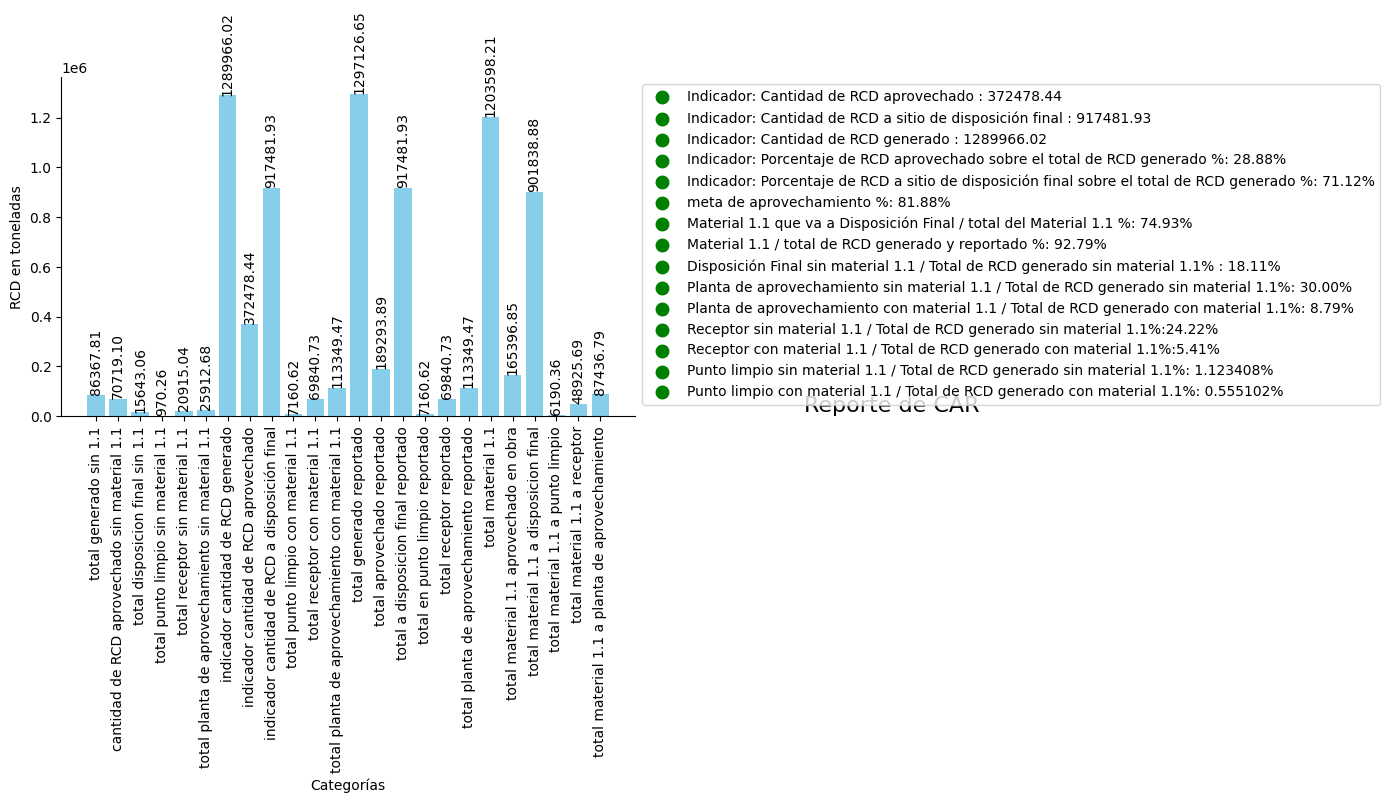

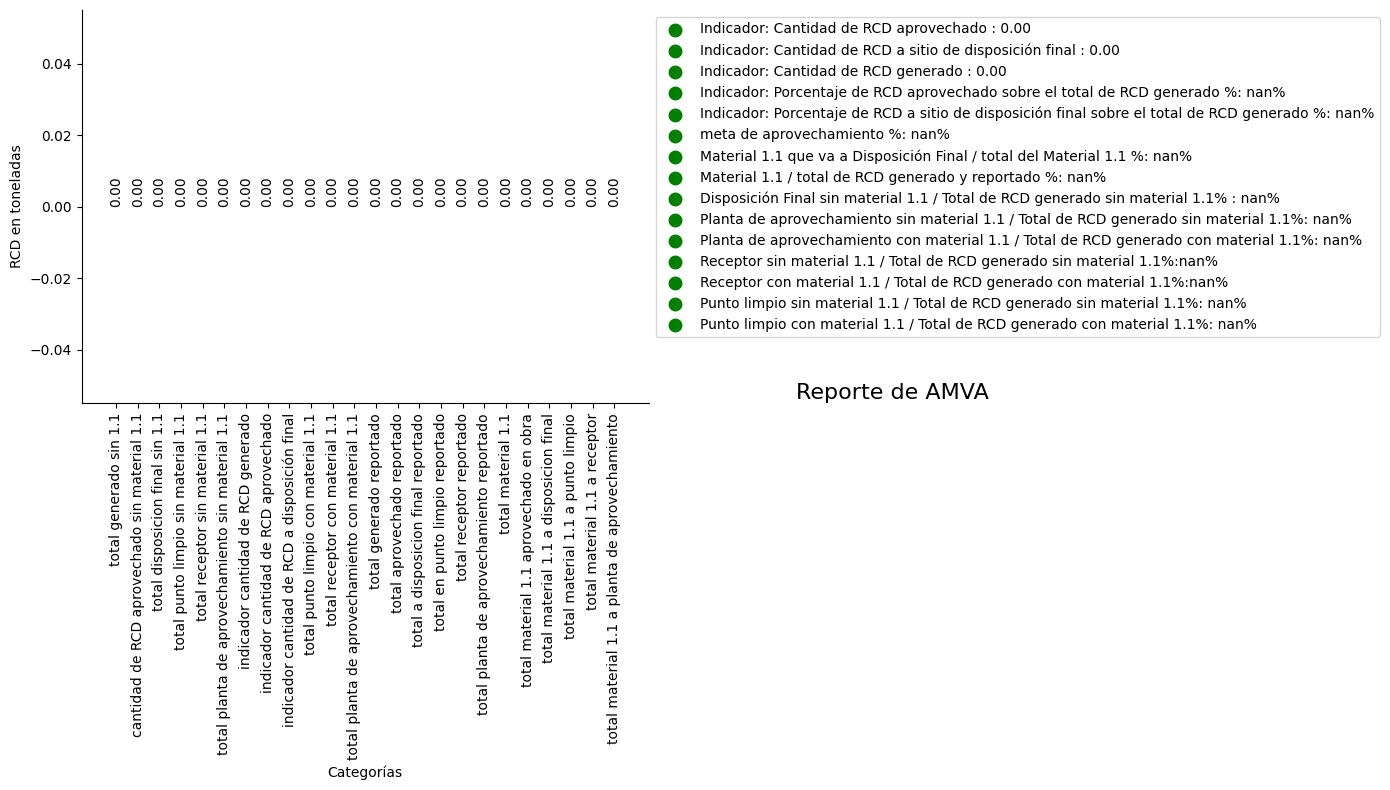

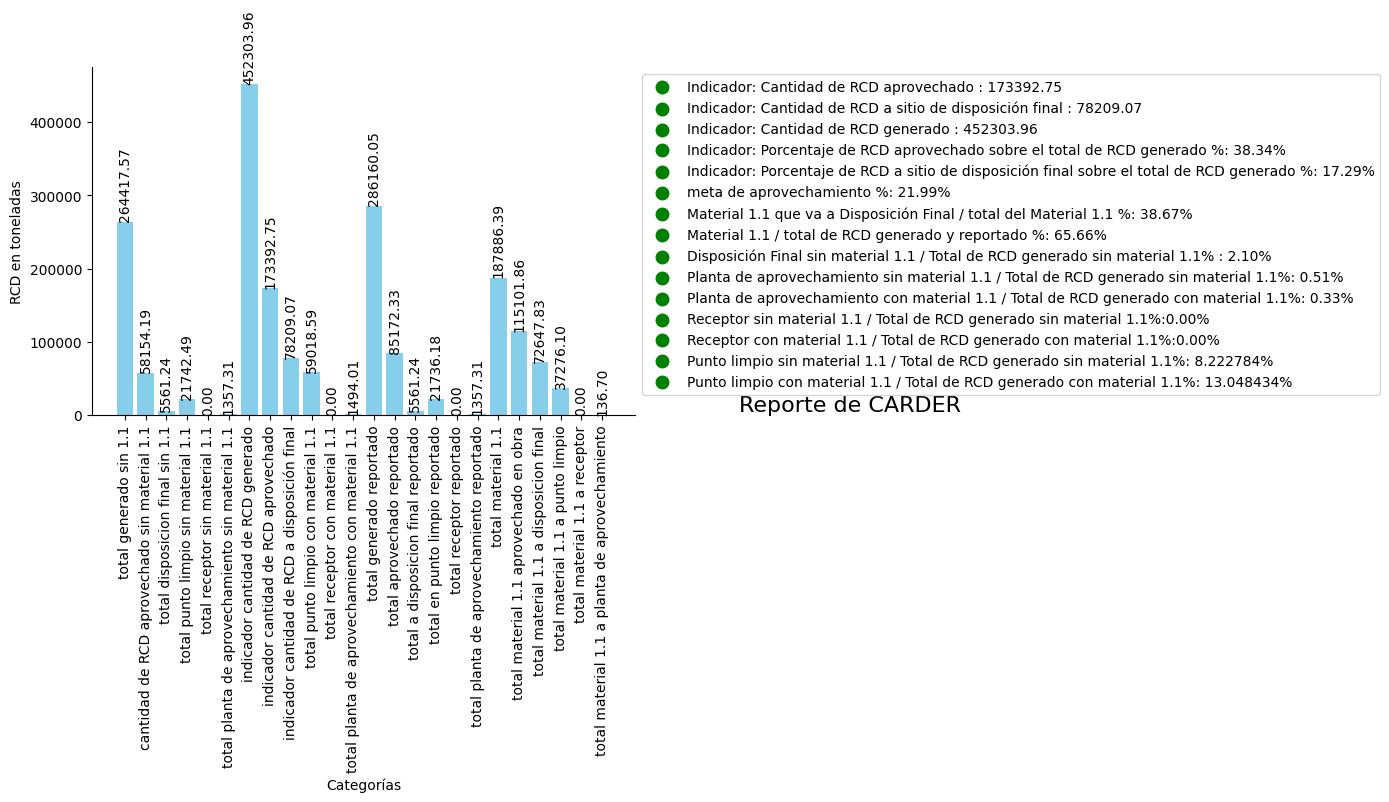

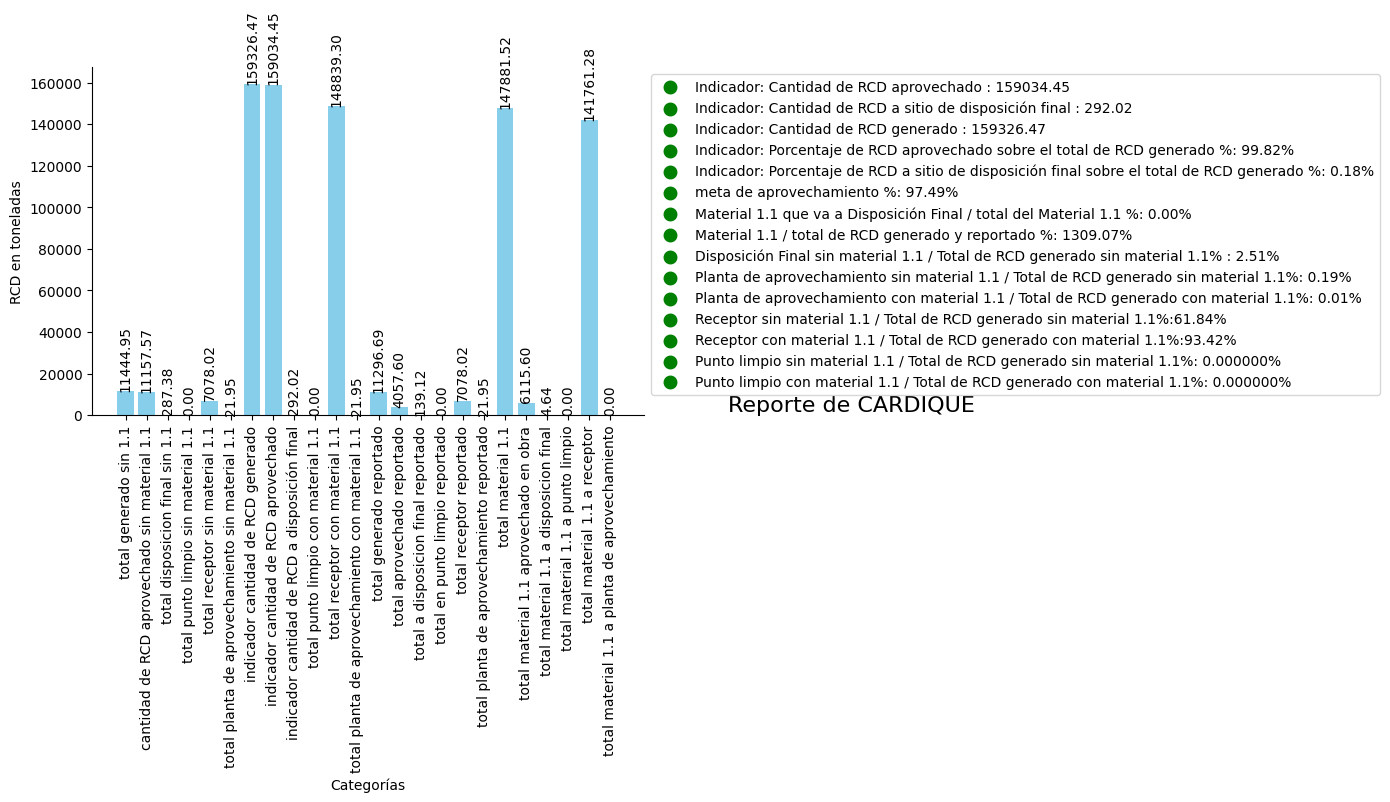

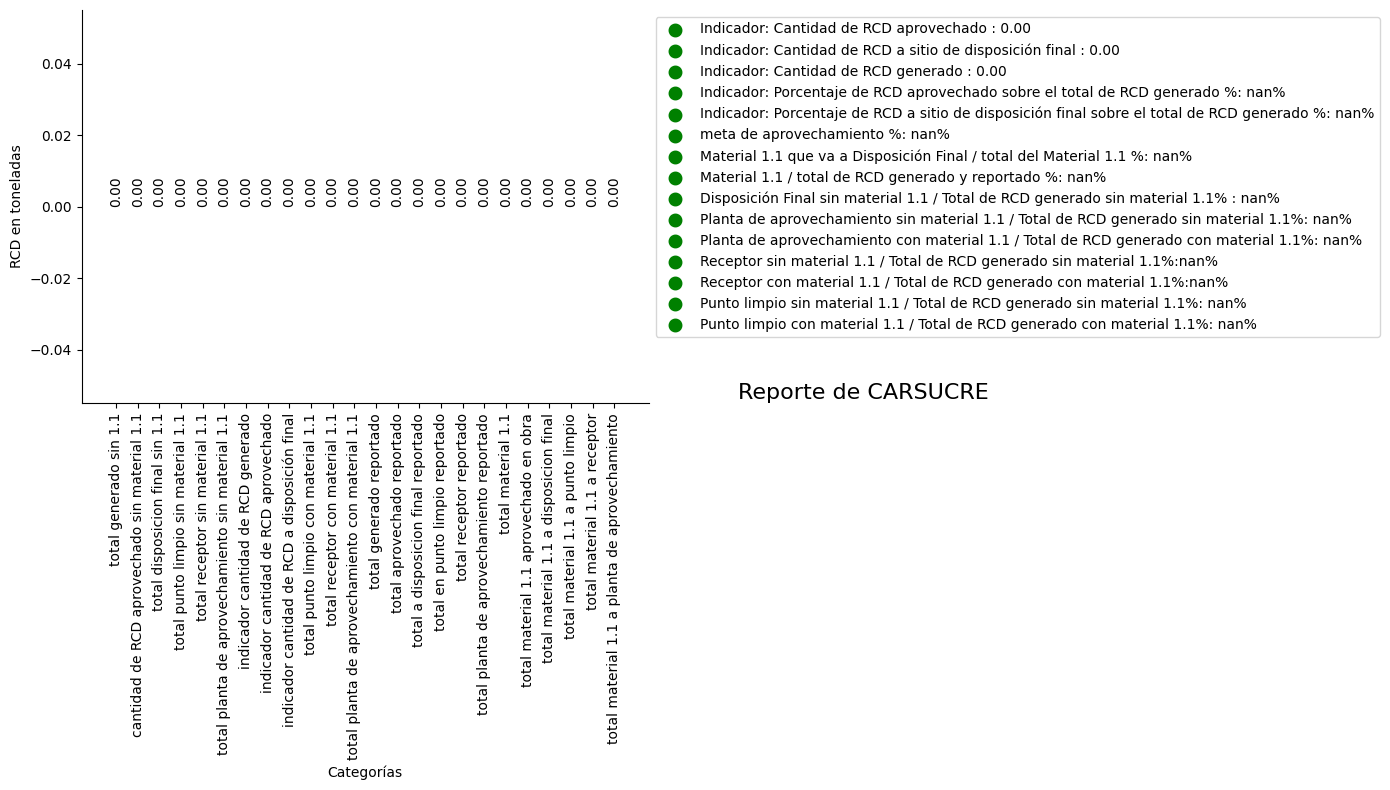

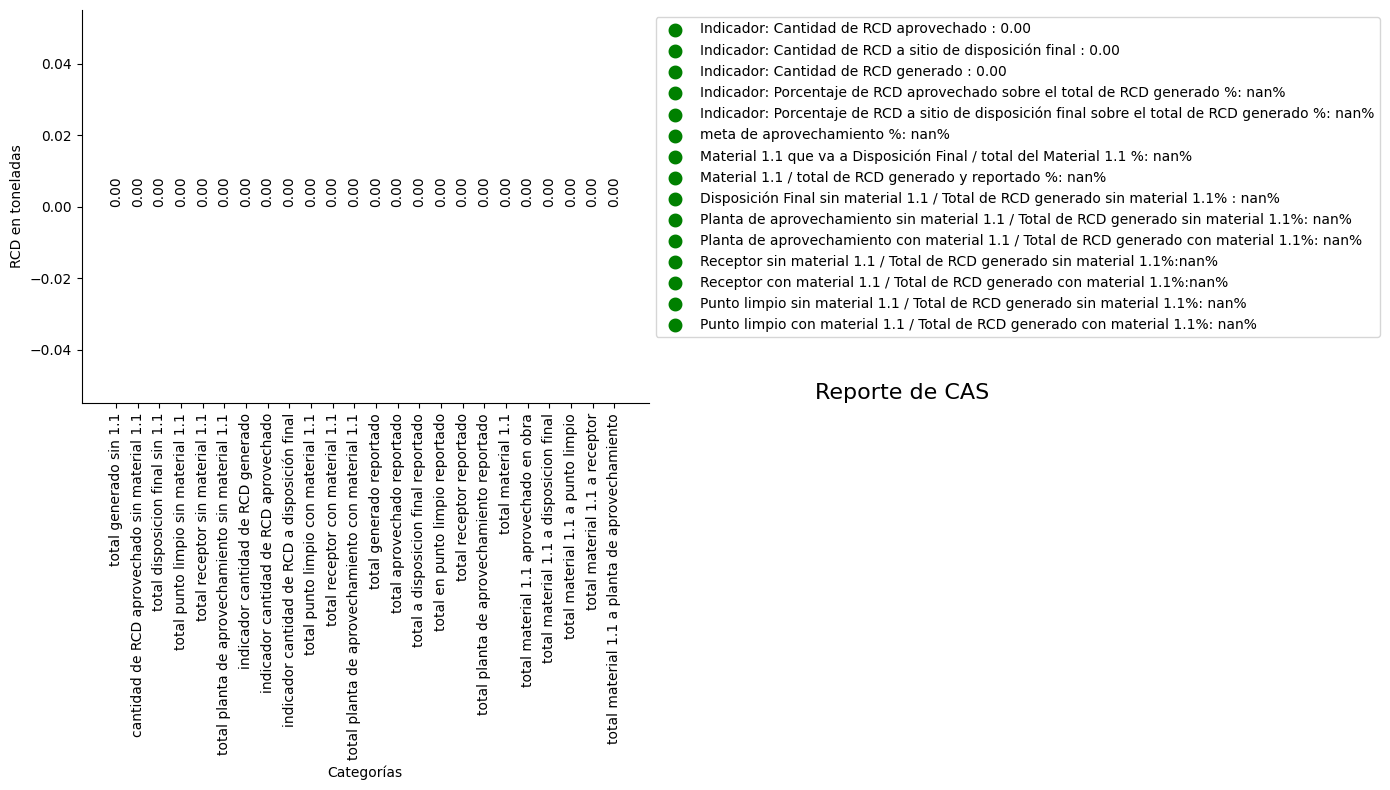

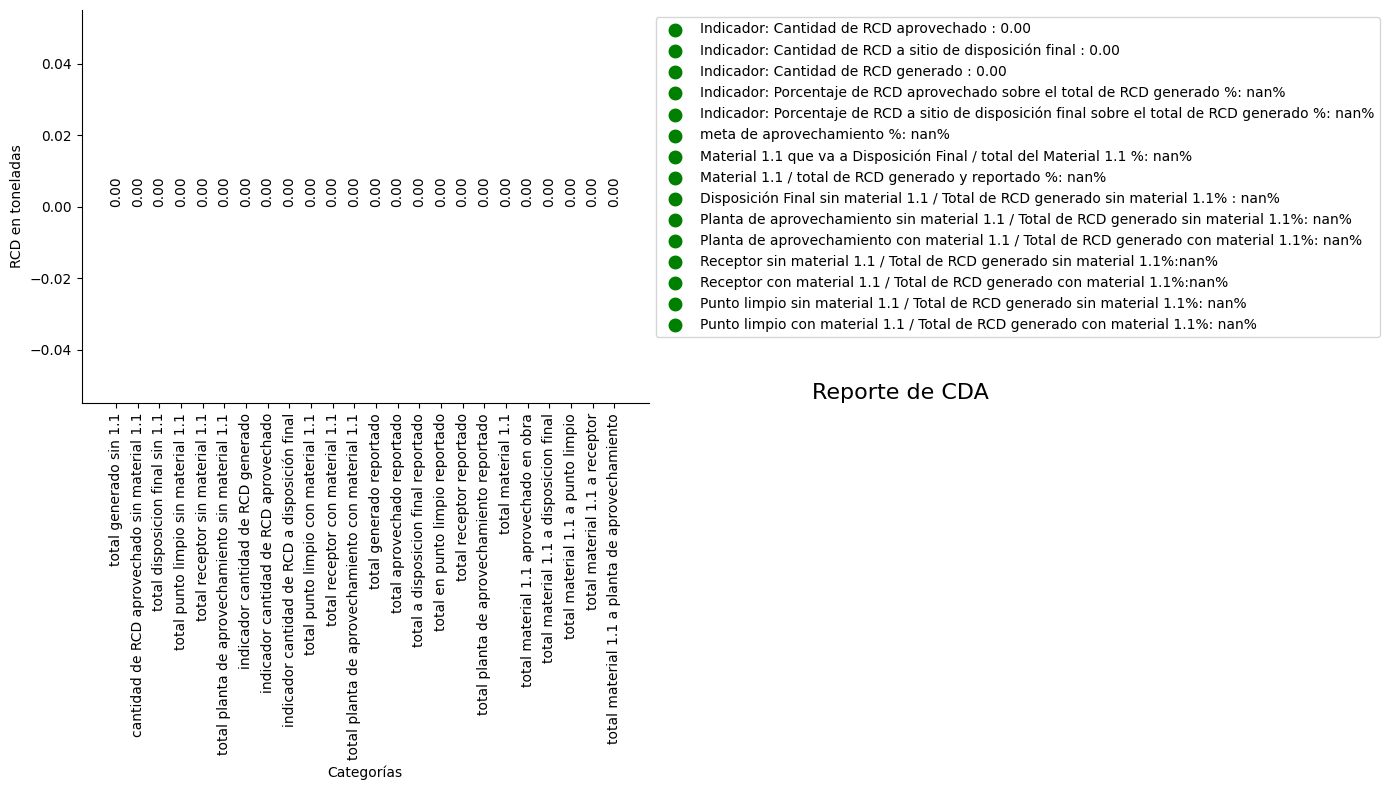

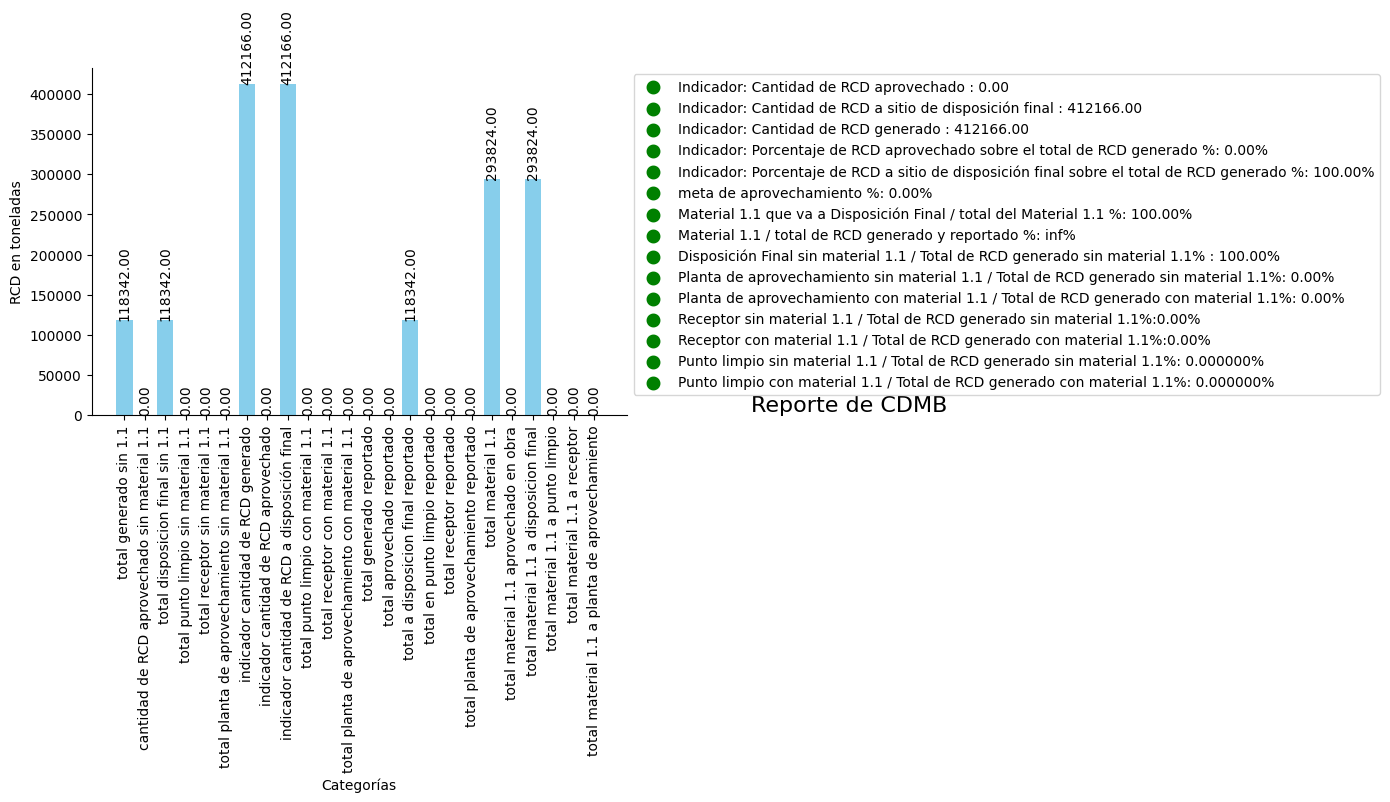

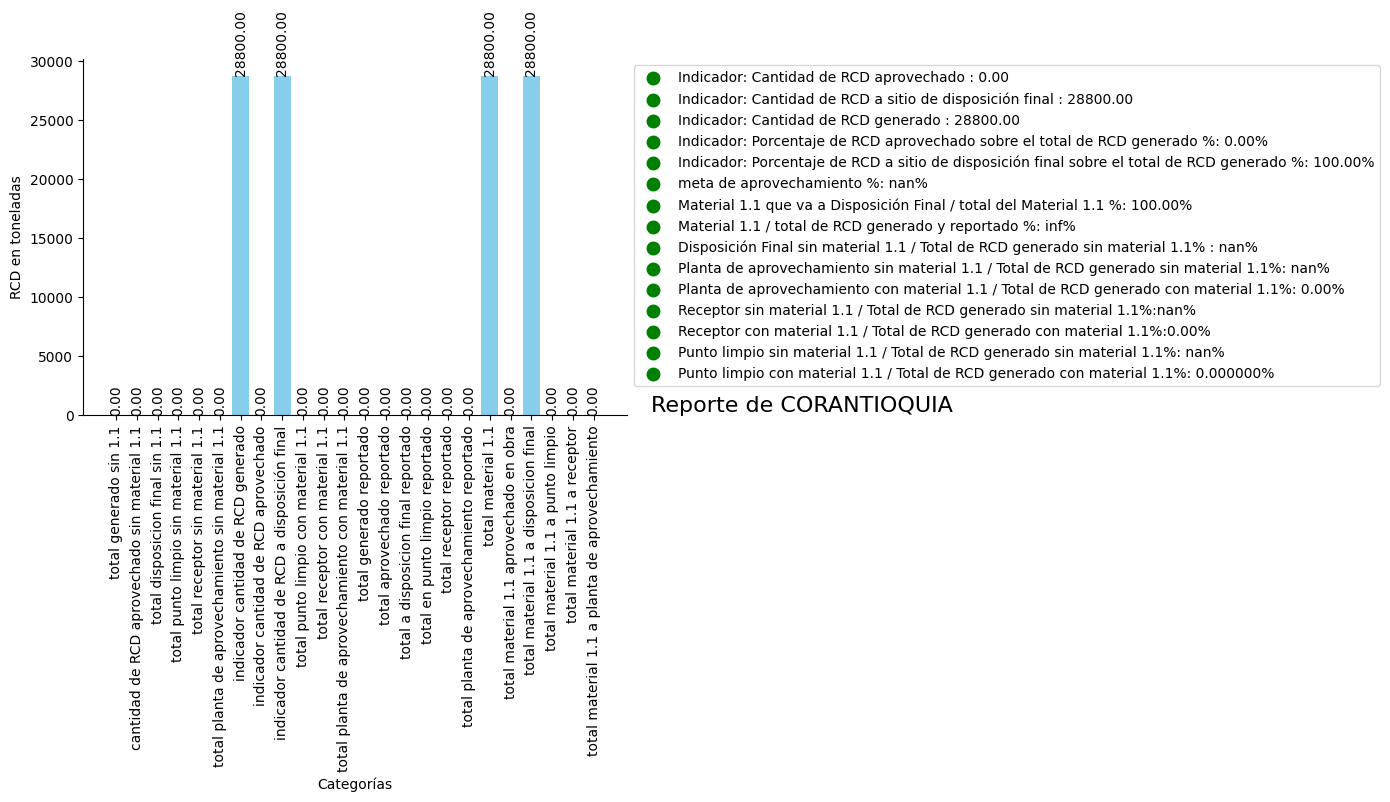

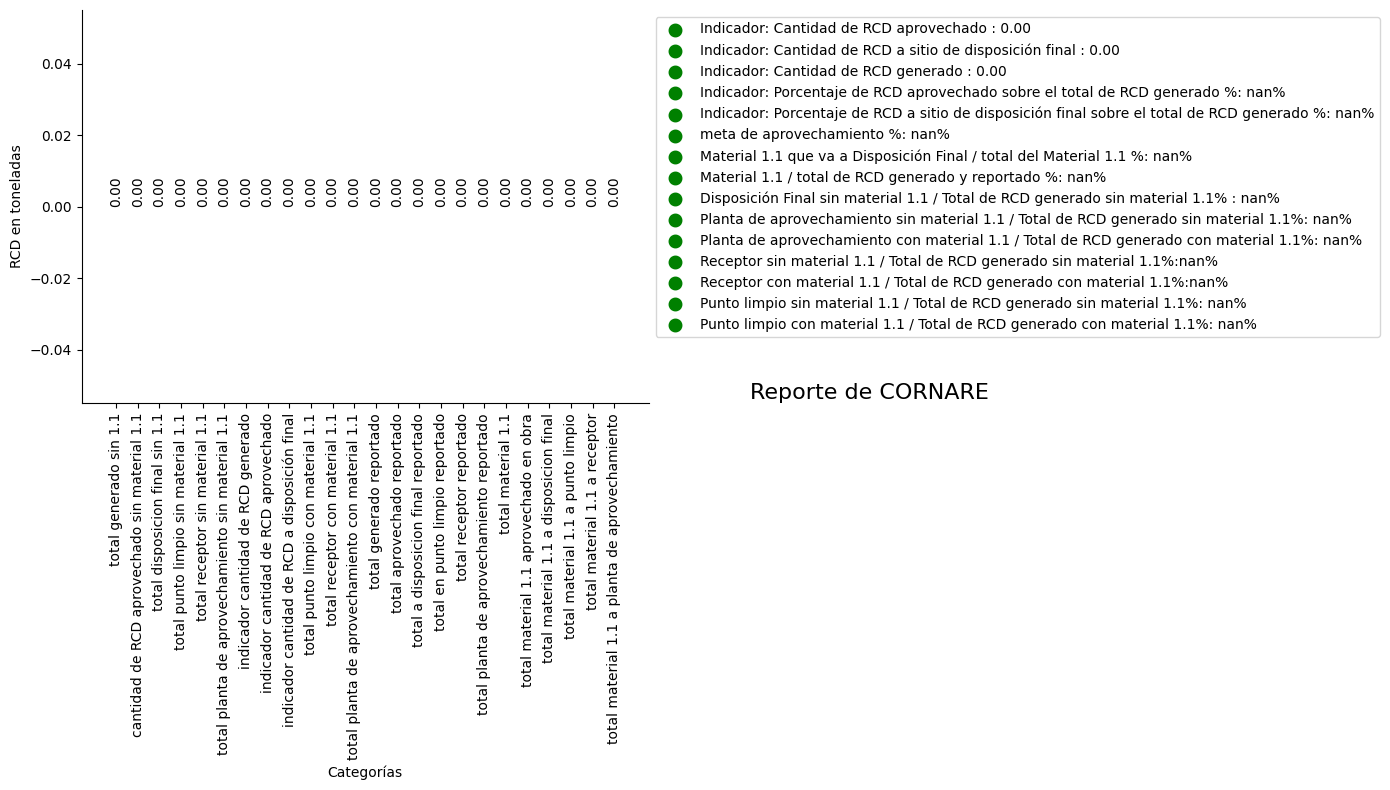

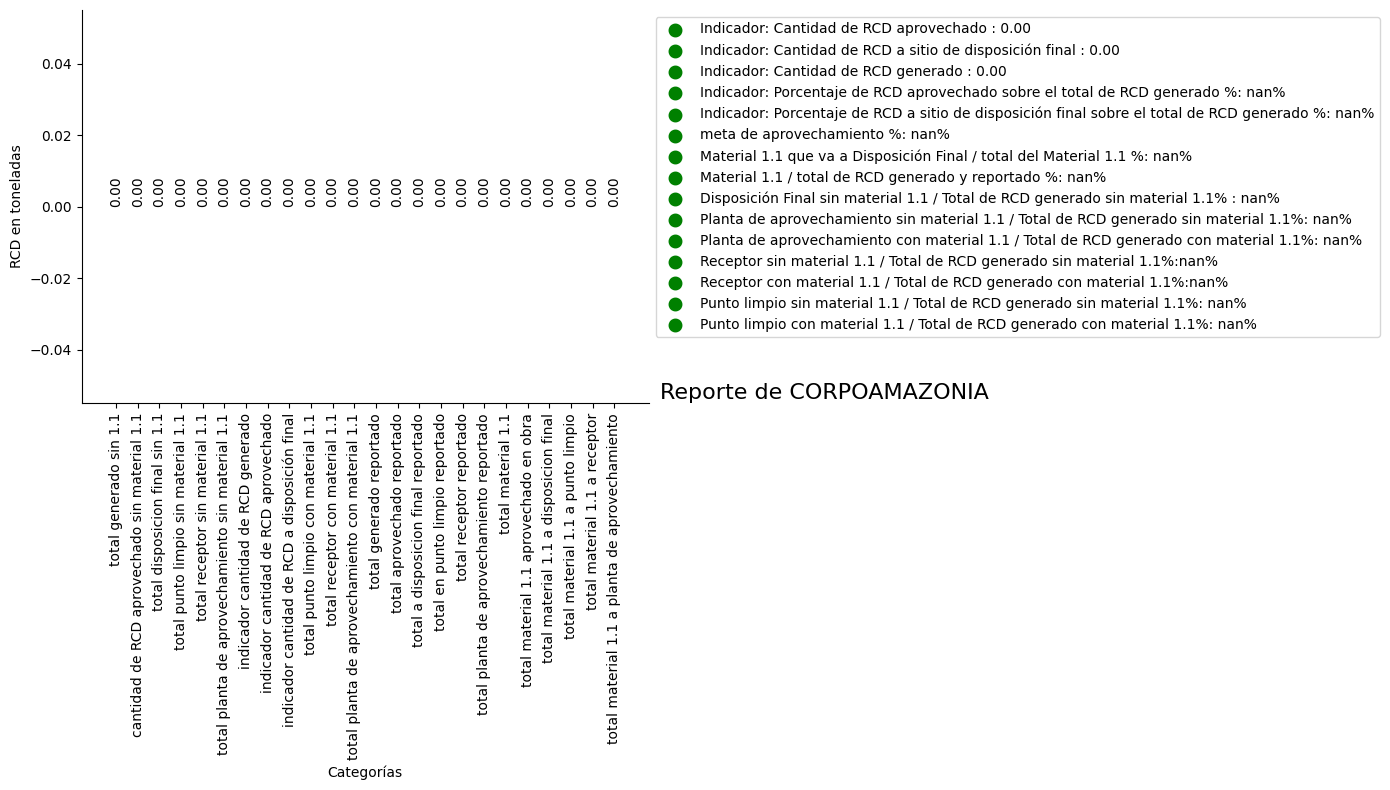

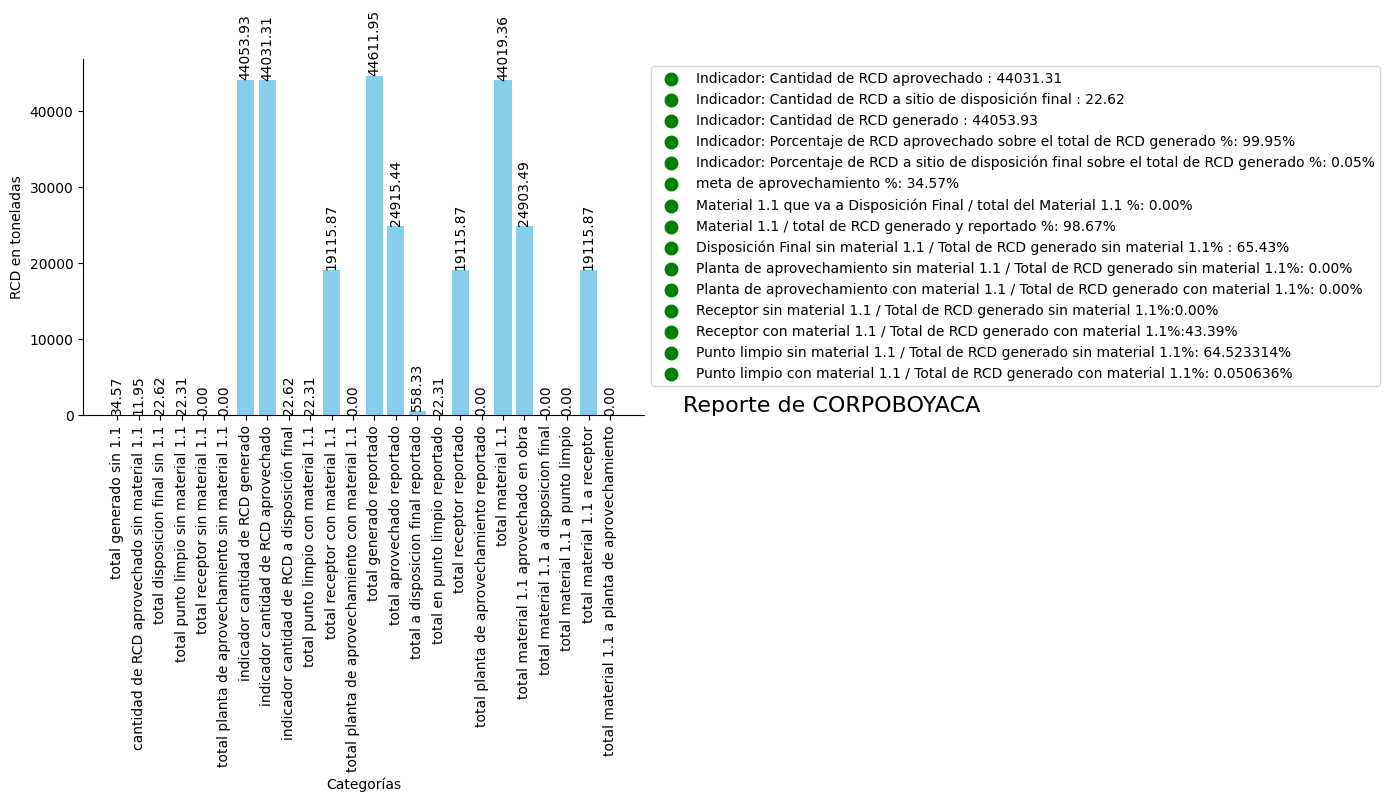

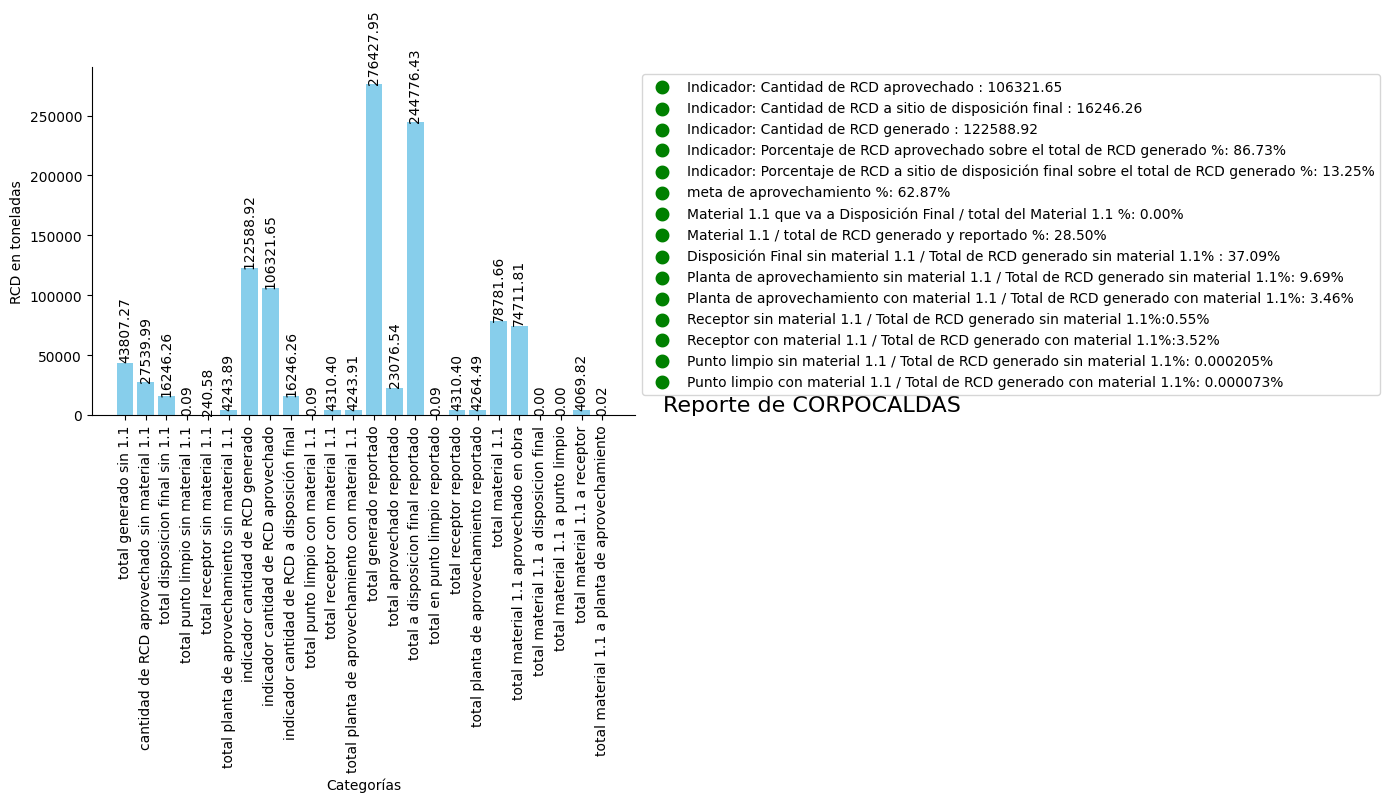

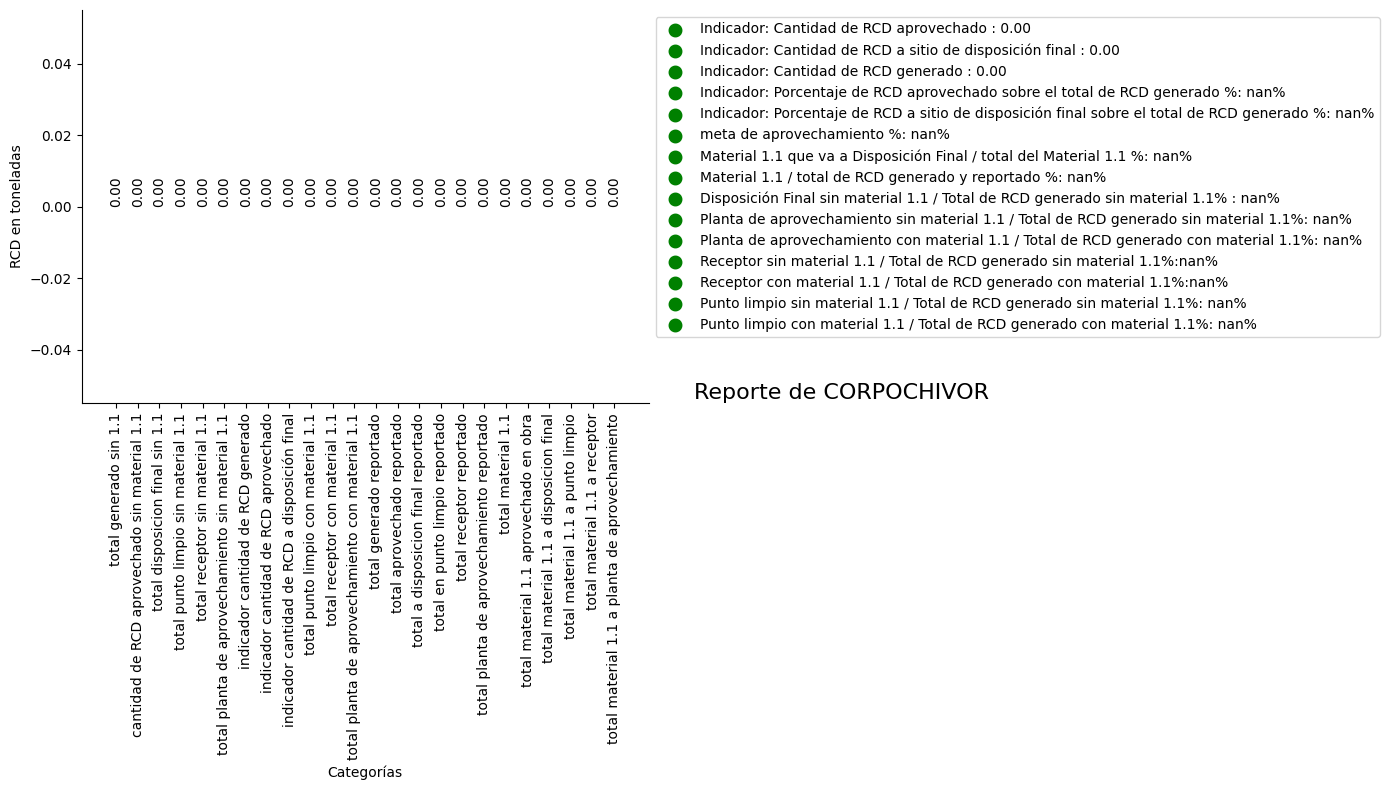

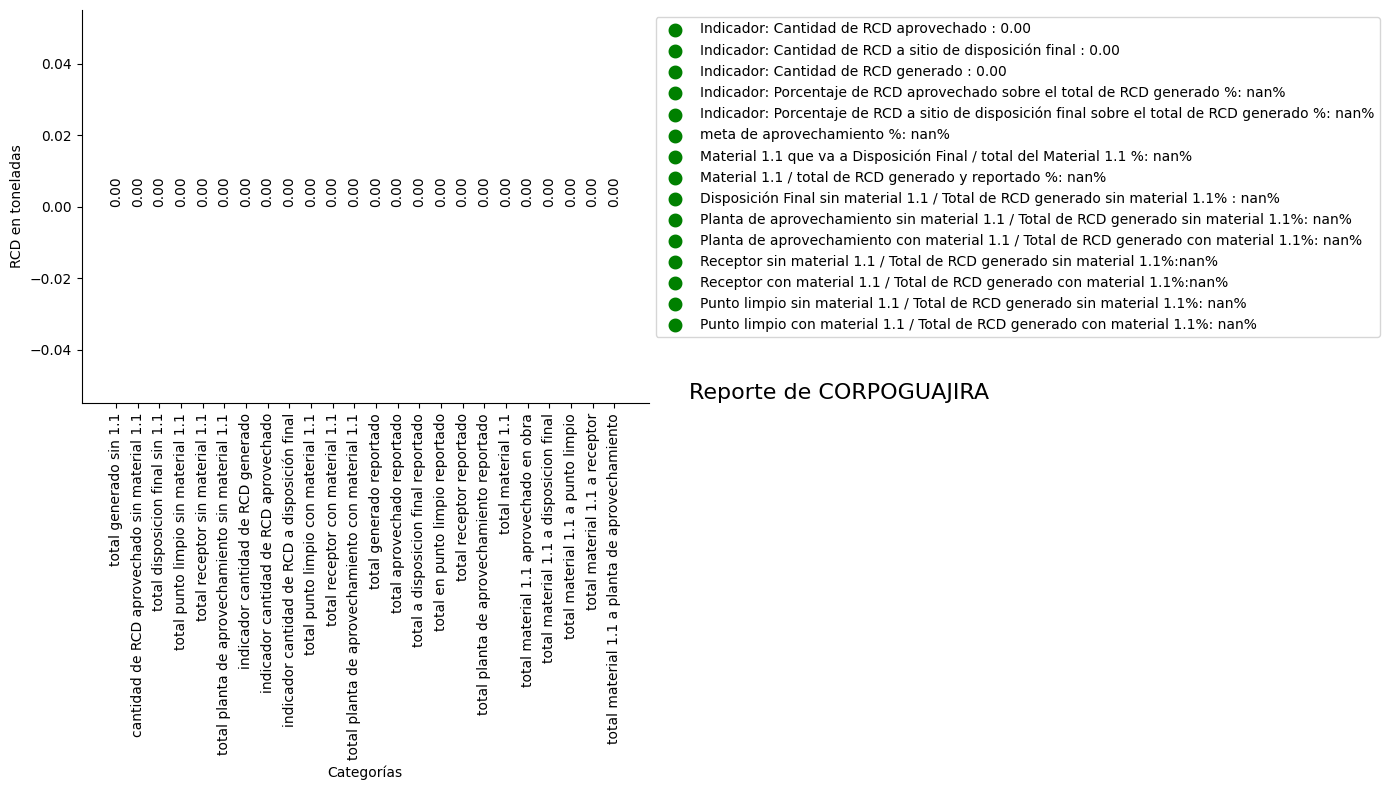

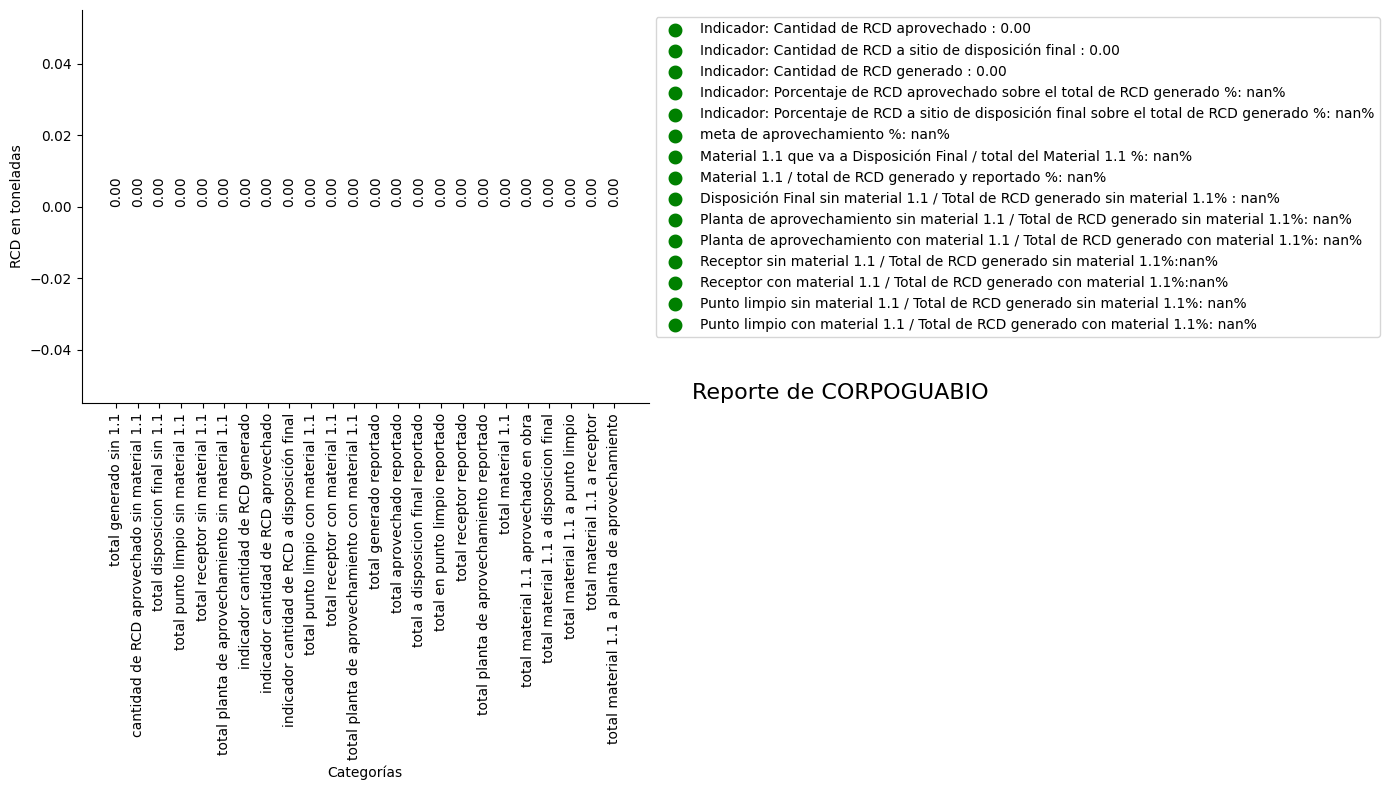

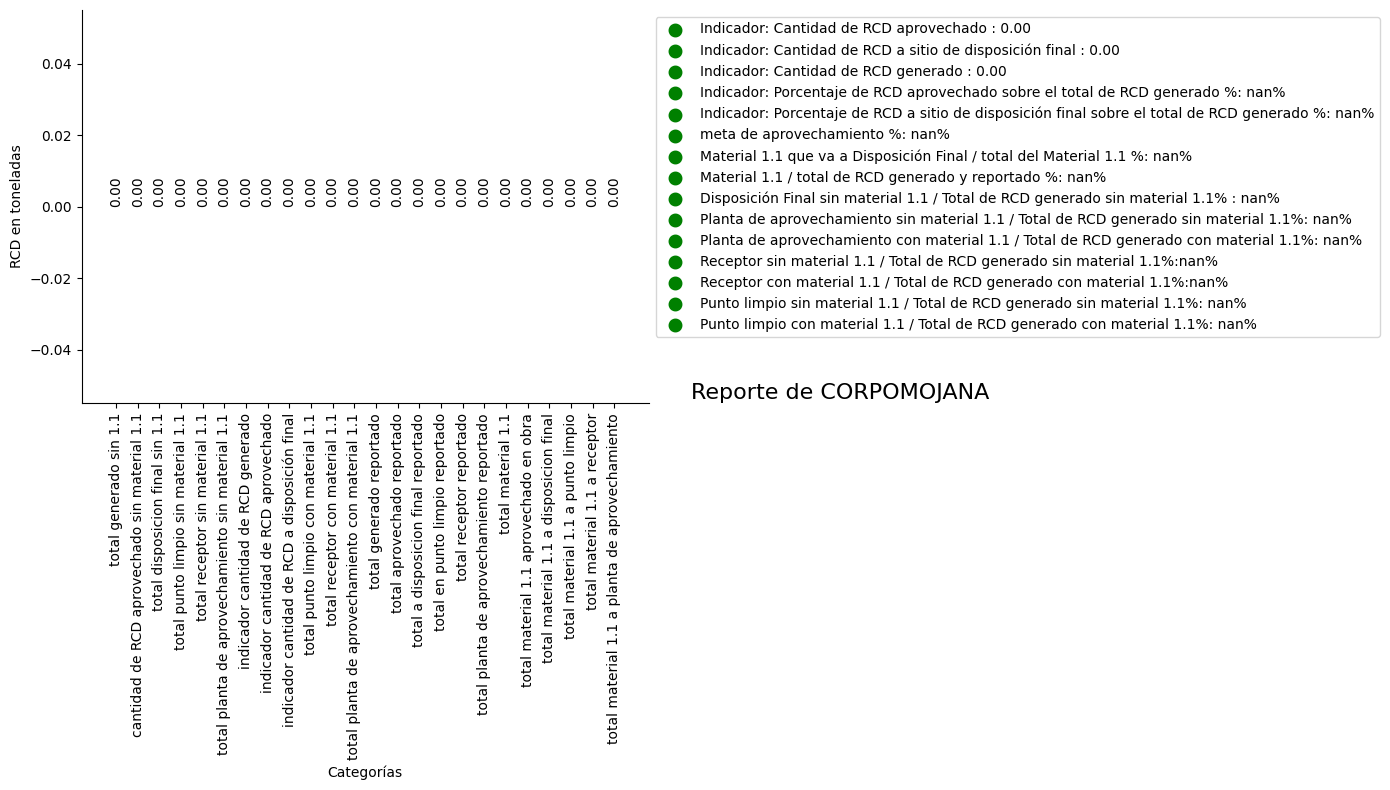

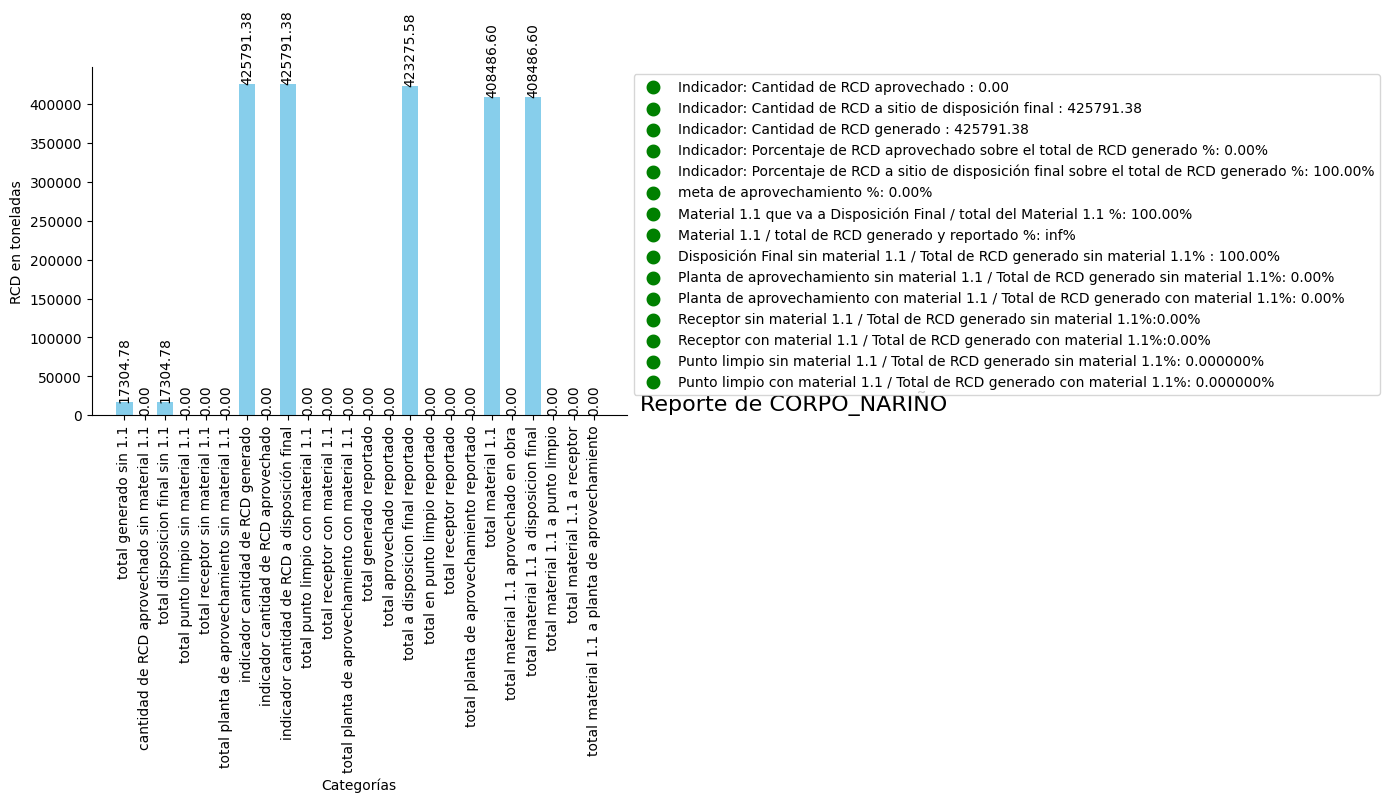

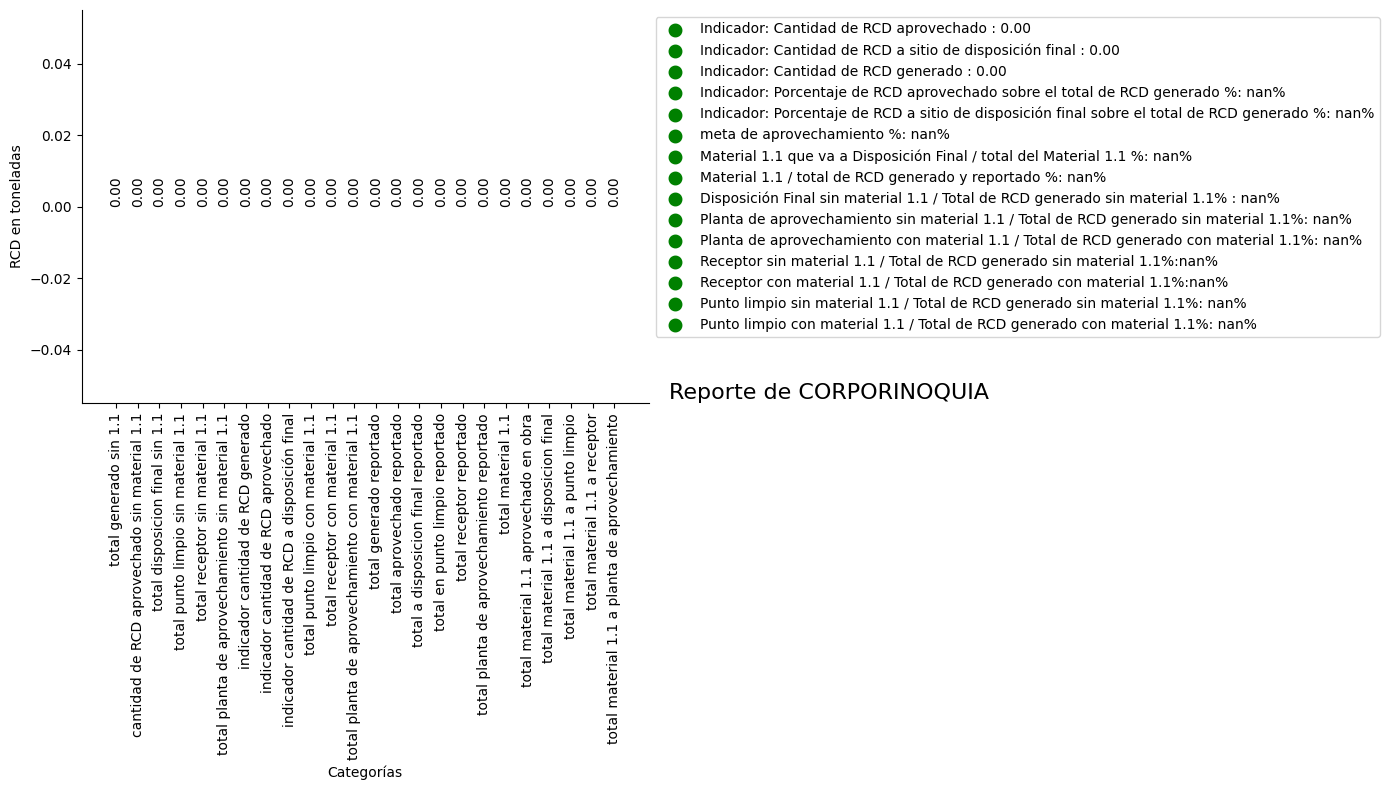

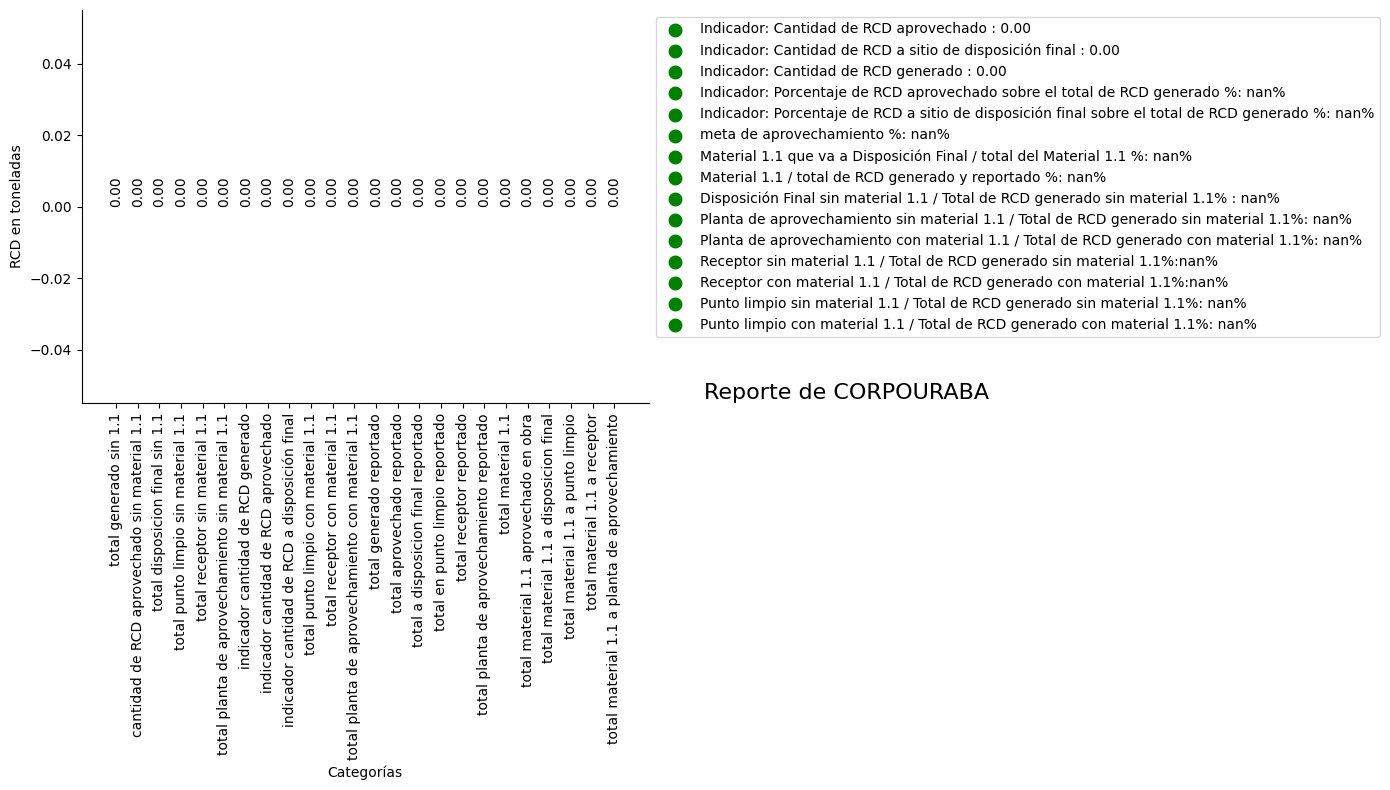

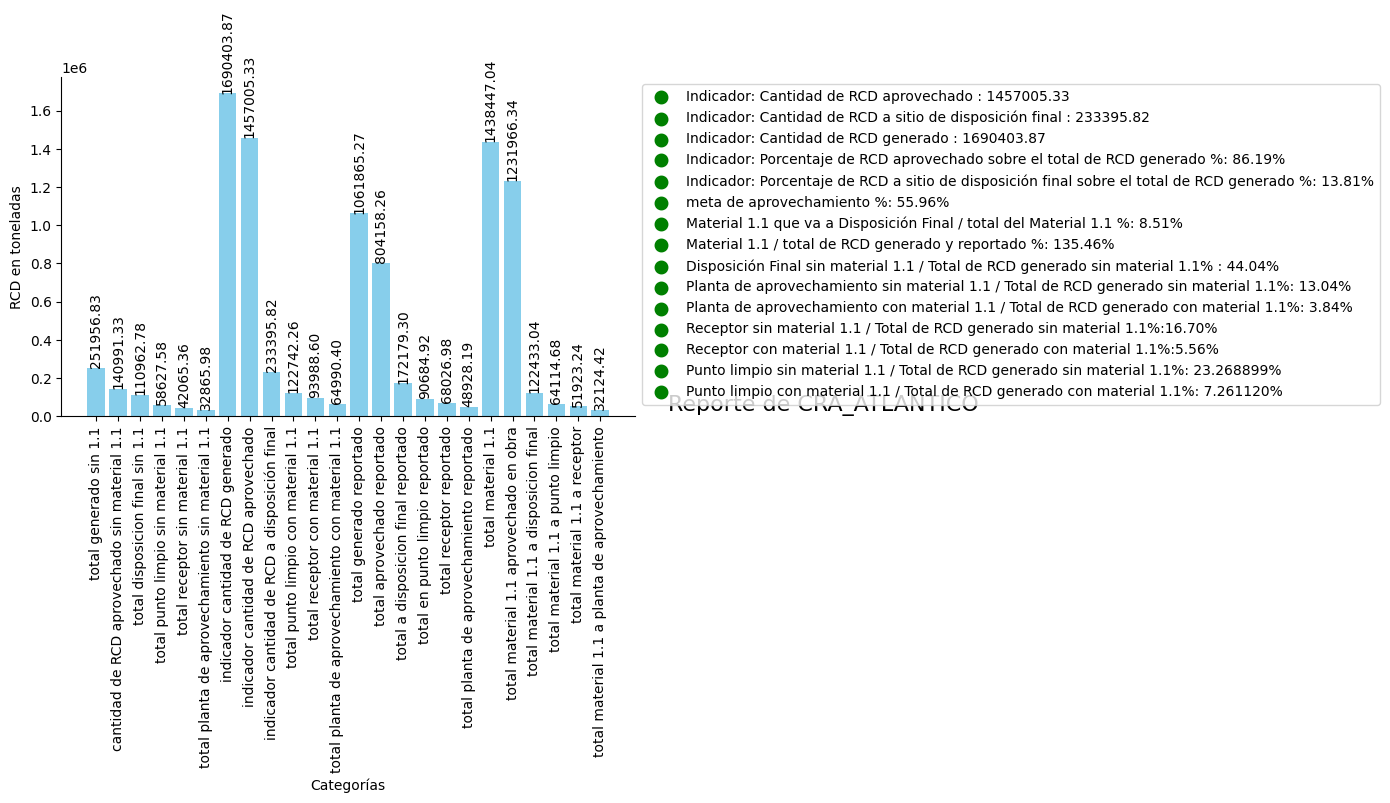

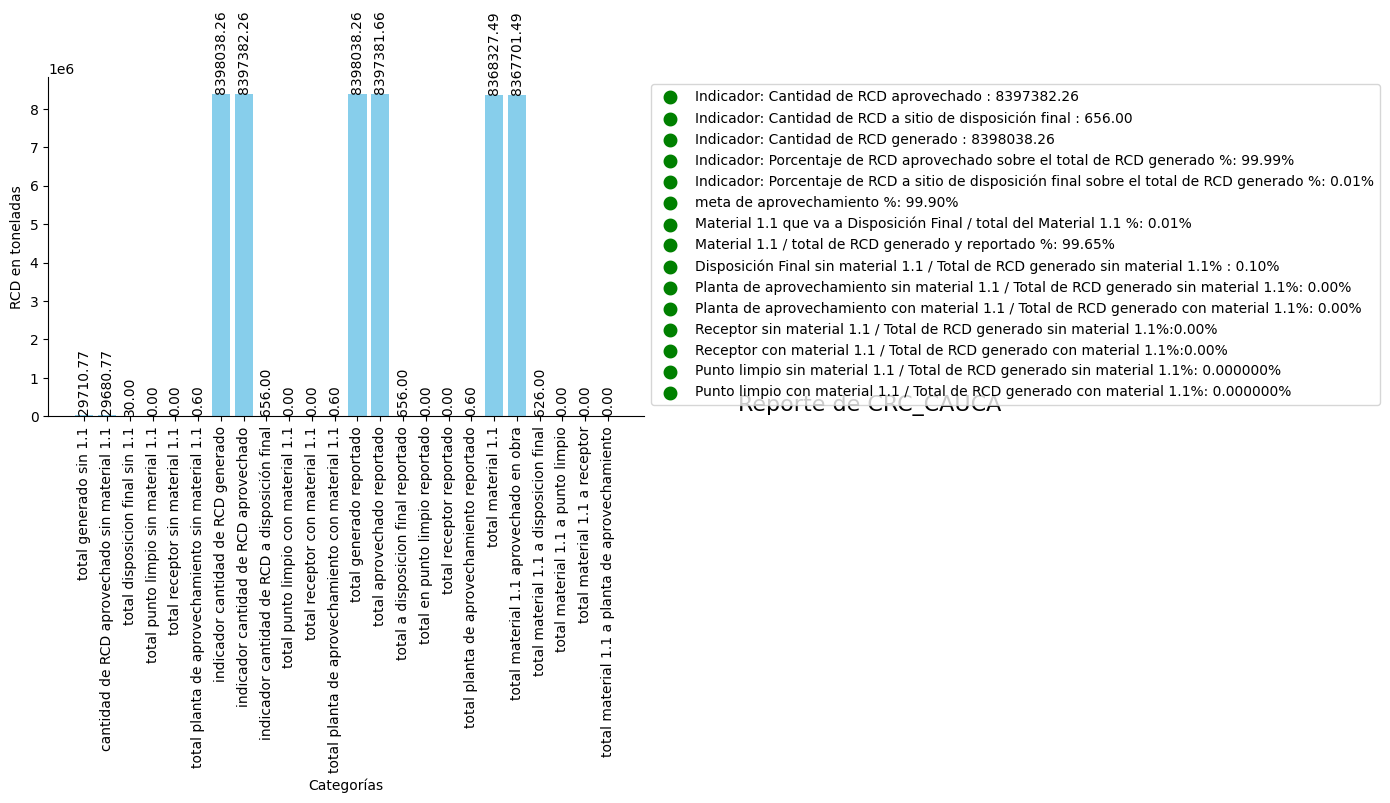

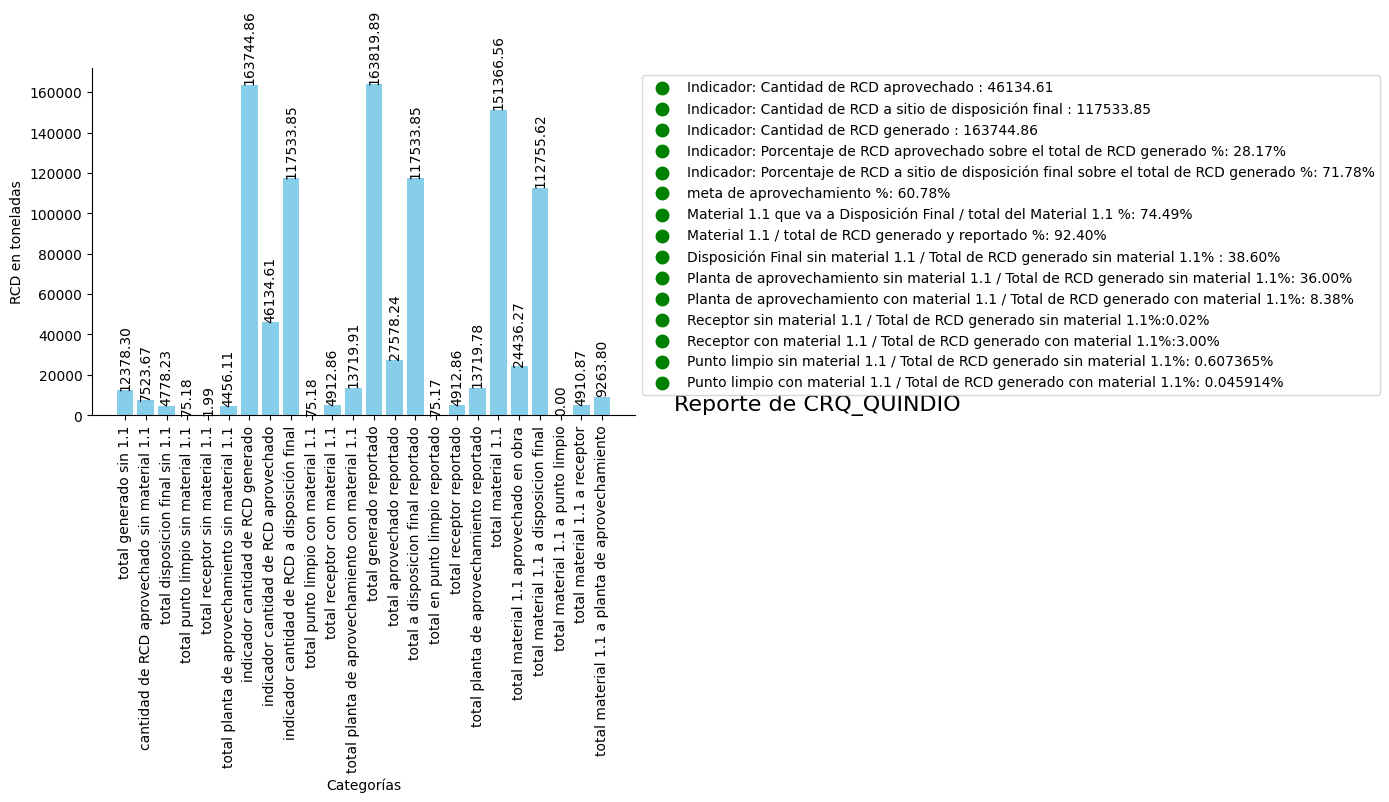

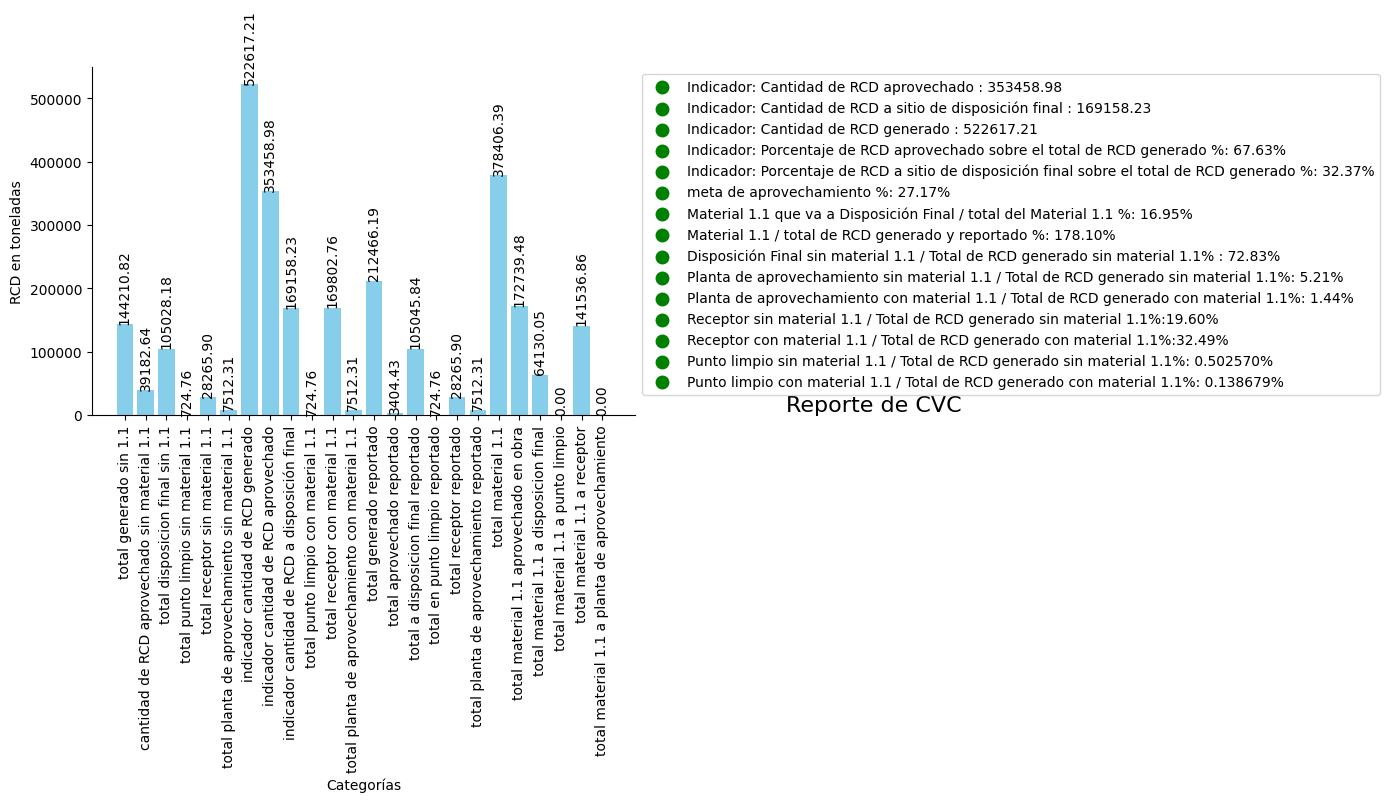

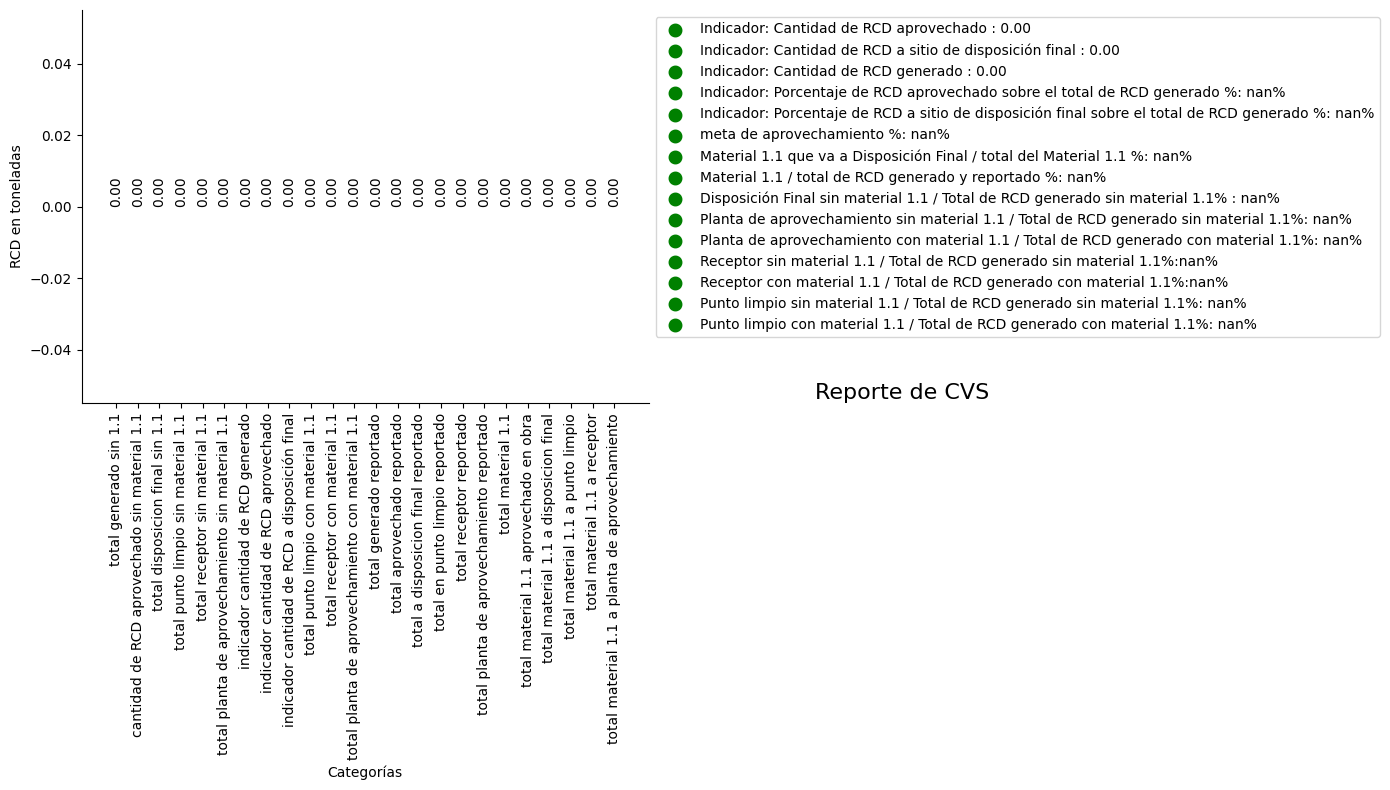

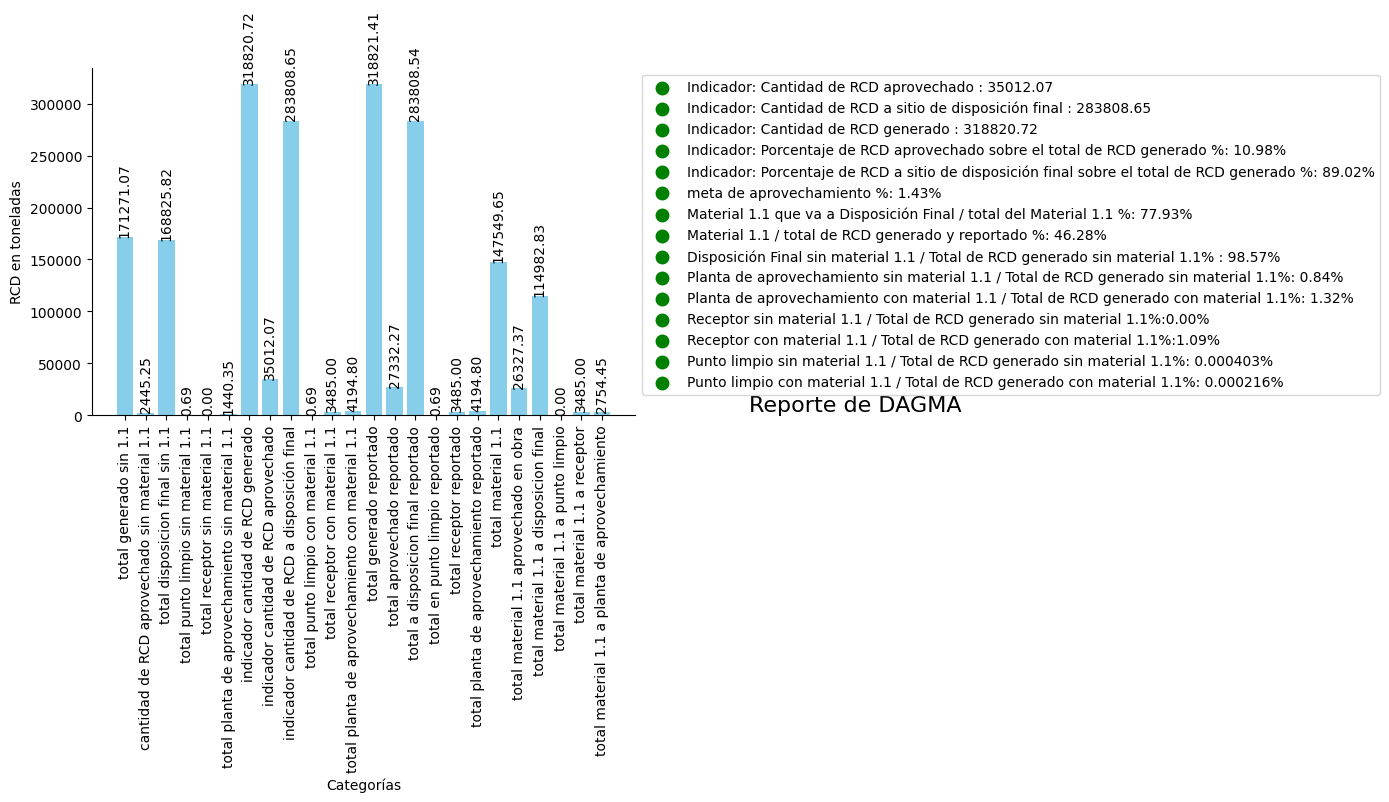

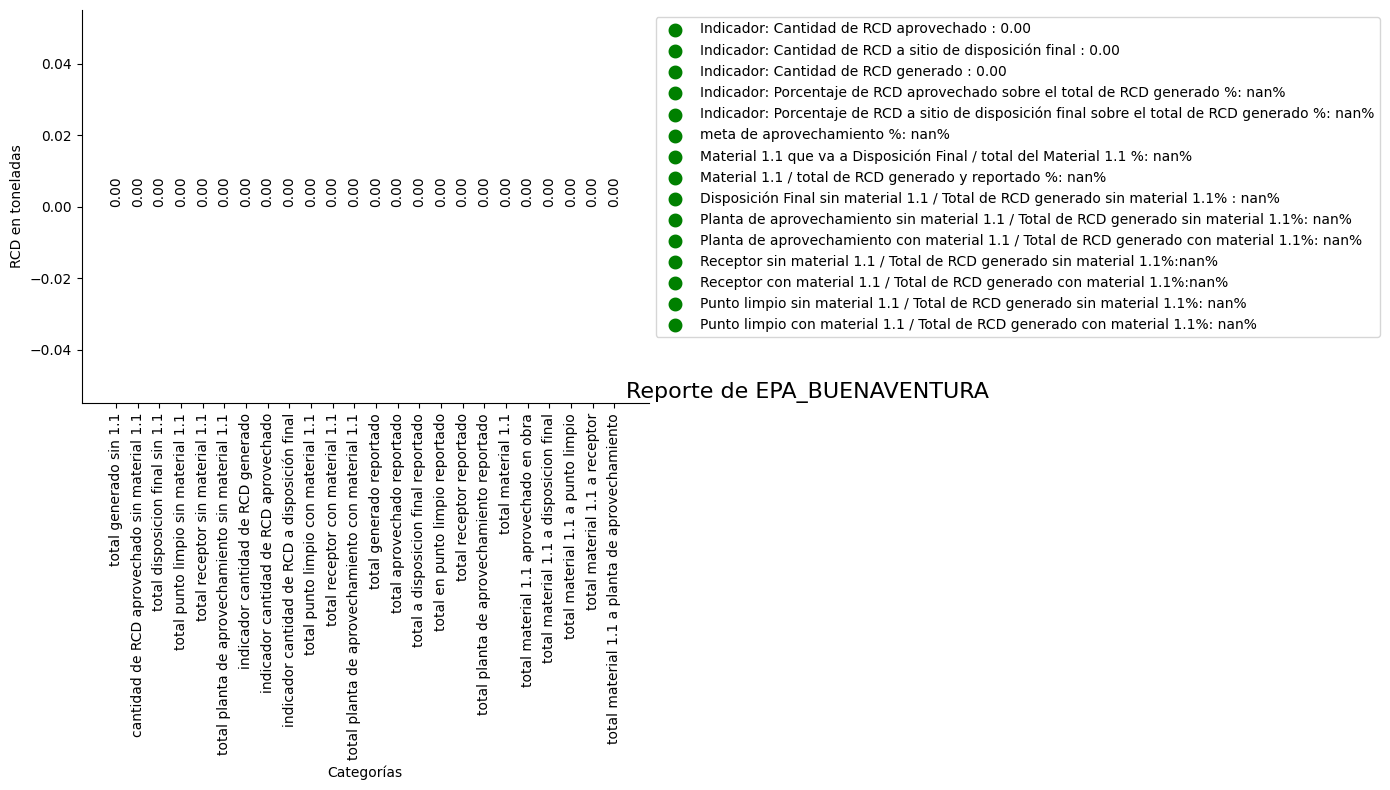

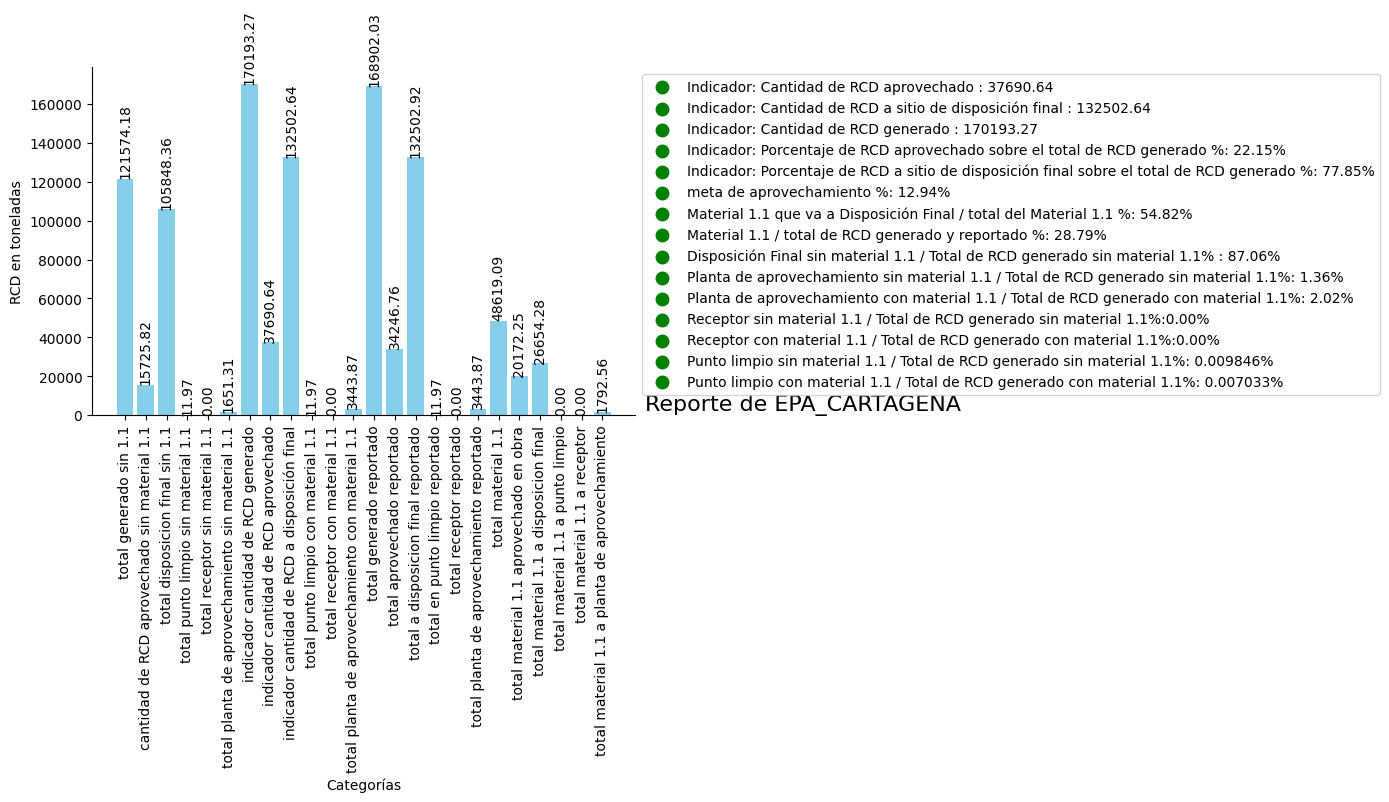

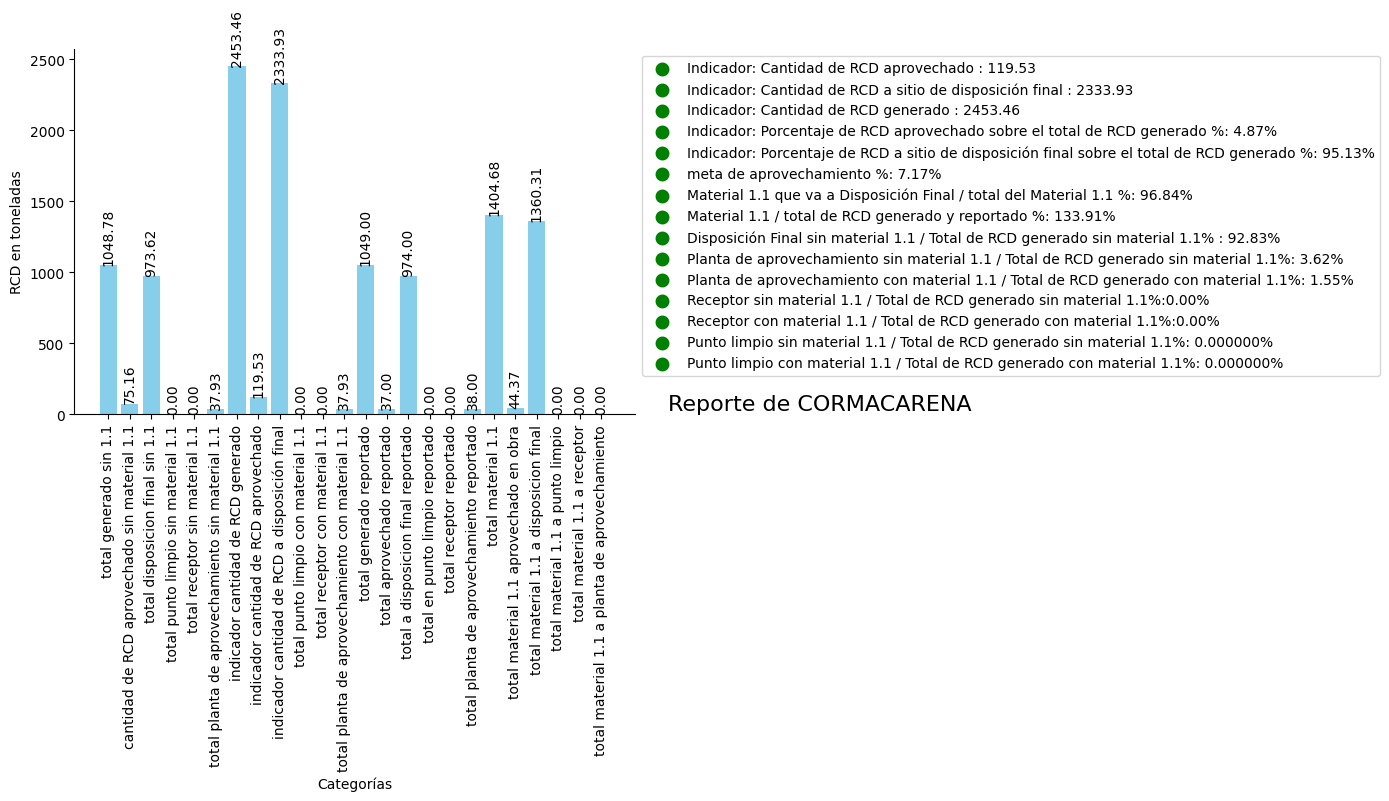

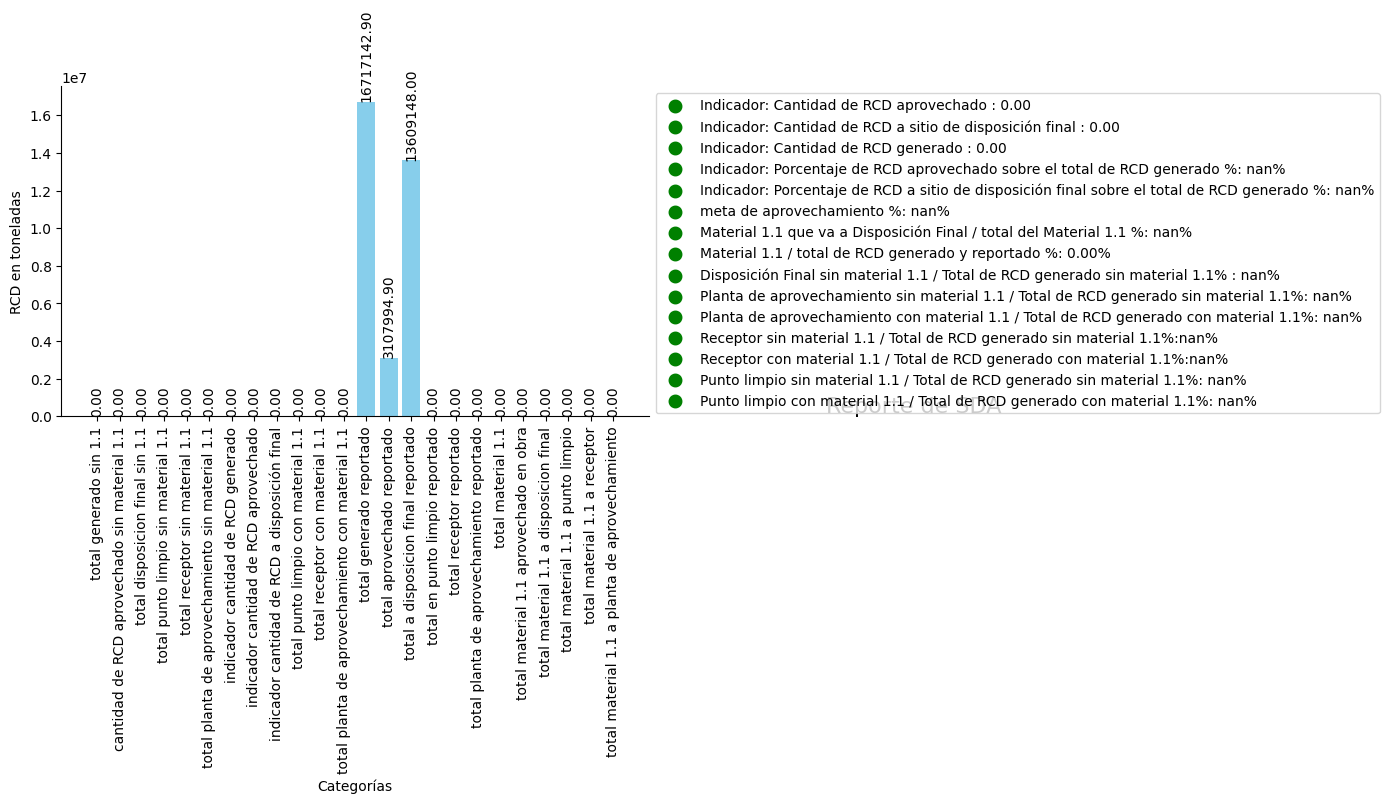

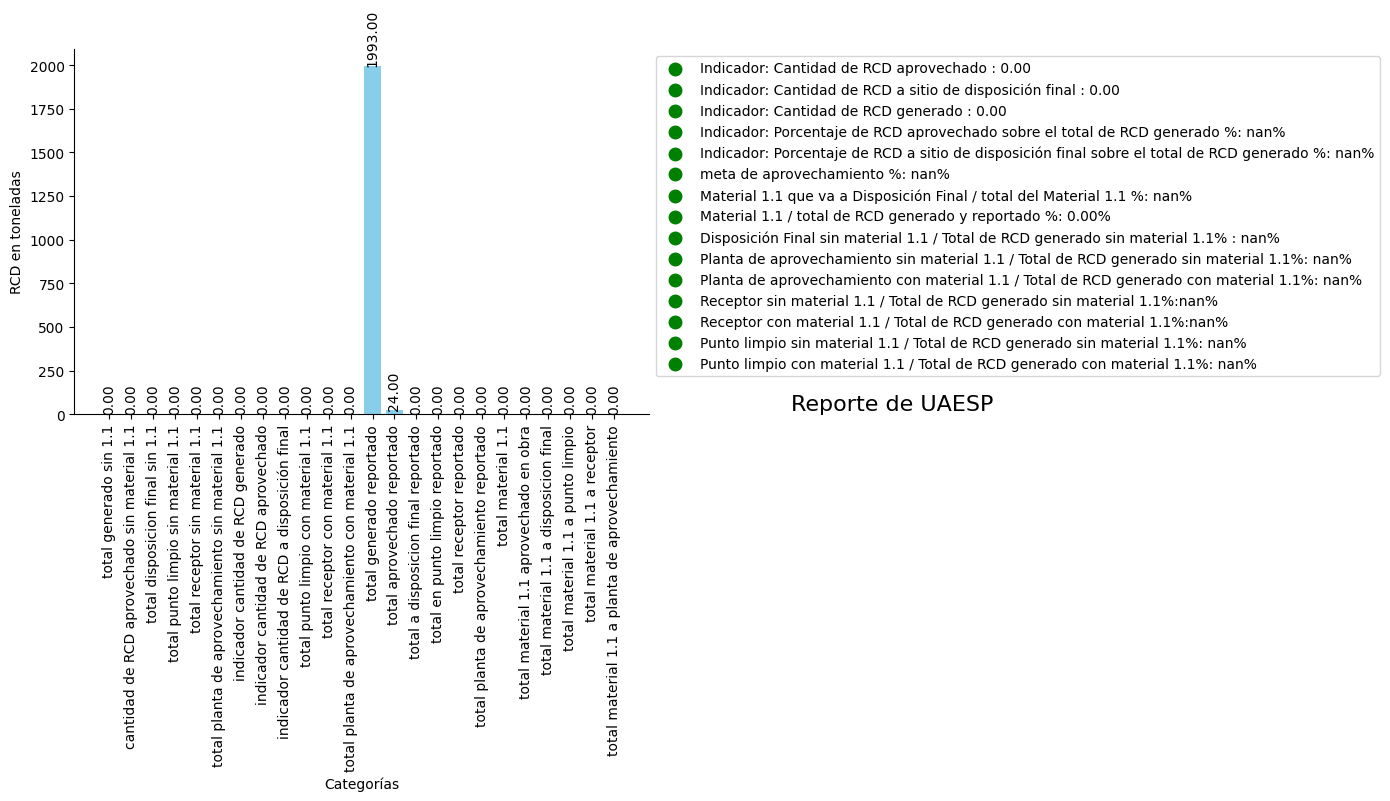

In [31]:
for autoridad in indicadores_autoridad:
    data = autoridad
    # Extracting keys and values
    # Extracting keys and values calculo_porcentaje_aprovechado_generado

    new_labels = list(keys.keys())
    values = [data[keys[label]] for label in new_labels]

    # Plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(new_labels, values, color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Categorías')
    plt.ylabel('RCD en toneladas')
    #plt.title(f"Reporte de {data['autoridad_ambiental'].upper()}")

    # Adding percentage legends without lines

    #legend_labels = [
    #    f"Material 1.1 que va a Disposición Final / total del Material 1.1 %: {data['calculo_porcentaje_disposicion_final_1_1_material_1_1']*100:.2f}%",
    #    f"meta de aprovechamiento %: {data['meta_de_aprovechamiento']*100:.2f}%",
    #    f"Material 1.1 calculado / generado reportado %: {data['calculo_procentaje_material_1_1_generado_reportado'] * 100:.2f}%",
    #    f""
    #]

    legend_labels = [
        f"Indicador: Cantidad de RCD aprovechado : {data['indicador_cantidad_de_rcd_aprovechado']:.2f}",
        f"Indicador: Cantidad de RCD a sitio de disposición final : {data['indicador_cantidad_de_rcd_disposicion_final']:.2f}",
        f"Indicador: Cantidad de RCD generado : {data['indicador_cantidad_rcd_generado']:.2f}",
        f"Indicador: Porcentaje de RCD aprovechado sobre el total de RCD generado %: {data['indicador_aprovechado_sobre_generado']*100:.2f}%",
        f"Indicador: Porcentaje de RCD a sitio de disposición final sobre el total de RCD generado %: {data['indicador_disposicion_final_sobre_generado']*100:.2f}%",
        f"meta de aprovechamiento %: {data['meta_de_aprovechamiento']*100:.2f}%",
        f"Material 1.1 que va a Disposición Final / total del Material 1.1 %: {data['porcentaje_disposicion_final_1_1_material_1_1']*100:.2f}%",
        f"Material 1.1 / total de RCD generado y reportado %: {data['porcentaje_material_1_1_generado_reportado'] * 100:.2f}%",
        f"Disposición Final sin material 1.1 / Total de RCD generado sin material 1.1% : {data['porcentaje_disposicion_final_sin_1_1_generado_sin_1_1'] *100:.2f}%",
        f"Planta de aprovechamiento sin material 1.1 / Total de RCD generado sin material 1.1%: {data['porcentaje_planta_de_aprovechamiento_sin_1_1_generado_sin_1_1'] *100:.2f}%",
        f"Planta de aprovechamiento con material 1.1 / Total de RCD generado con material 1.1%: {data['porcentaje_planta_de_aprovechamiento_con_1_1_generado_con_1_1'] *100:.2f}%",
        f"Receptor sin material 1.1 / Total de RCD generado sin material 1.1%:{data['porcentaje_receptor_sin_1_1_generado_sin_1_1'] * 100:.2f}%",
        f"Receptor con material 1.1 / Total de RCD generado con material 1.1%:{data['porcentaje_receptor_con_1_1_generado_con_1_1'] * 100:.2f}%",
        f"Punto limpio sin material 1.1 / Total de RCD generado sin material 1.1%: {data['porcentaje_punto_limpio_sin_1_1_generado_sin_1_1'] * 100:2f}%",
        f"Punto limpio con material 1.1 / Total de RCD generado con material 1.1%: {data['porcentaje_punto_limpio_con_1_1_generado_con_1_1'] * 100:2f}%"
    ] 

    #plt.legend(bars, legend_labels, loc='upper right', bbox_to_anchor=(1, 1))
    # Add custom legend outside the plot
    plt.legend(handles=[plt.scatter([], [], color='green', lw=4, label=label) for label in legend_labels], 
               loc='upper left', bbox_to_anchor=(1, 1))
    # Adding values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', rotation=90, fontsize=10)
    # Manually placing the title at the bottom right
    plt.text(1.60, 0.0, f"Reporte de {data['autoridad_ambiental'].upper()}", fontsize=16, ha='right', va='bottom', transform=plt.gca().transAxes)    
    # Remove the spines (border)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.show()